# VENTA DE SEGUROS DE VIAJERO

## Resumen

Un tour operador y agencia de viajes ofrece a sus clientes un paquete de seguros de viaje.

Basándose en el historial de su base de datos, la empresa necesita saber qué clientes estarían interesados en comprarlo.

Los datos se tomaron del rendimiento y las ventas del paquete durante un período de tiempo. El seguro se ofreció a algunos clientes.

## Contexto comercial
La empresa busca ofrecer a sus clientes un paquete de seguros de viaje. 

Para tomar decisiones informadas y maximizar las oportunidades de venta, la empresa analiza el historial de su base de datos, que contiene información sobre el rendimiento y las ventas del paquete de seguros durante un período de tiempo. Utilizando estos datos, la empresa pretende identificar qué clientes podrían estar interesados en comprar el seguro de viaje.

Mediante este análisis, la empresa podrá enfocar sus esfuerzos de marketing y ventas en el público objetivo adecuado y mejorar la efectividad de su estrategia comercial.

## Problema comercial

 Se desea conocer la situación general de los clientes, y para ello, se consulta las siguientes cuestiones:

 La principal cuestión sobre la que se necesita conocer información es ¿cual es el porcentaje de compra de seguro de viajes de nuestros clientes historicos?



## Objetivo

Determinar si un cliente es propenso a comprar un seguro de viaje

Preguntas a responder:
1. ¿Existe una diferencia en la compra de seguro de viajes entre empleados publicos y privados?

2. ¿La edad influye en la probabilidad de comprar un seguro de viaje? ¿Cómo se distribuye esta relación?

3. ¿Es en ingreso anual motivo evidente?

4. ¿Es más probable que una persona con enfermedades previas compre un seguro de viaje?

5. ¿El nivel de estudio y la edad en una persona "disparan" la necesidad de comprar un seguro de viaje?

6. ¿Las personas que son pasajeros frecuentes tienen más probabilidades de comprar un seguro de viaje?



## Datos

Fuente del dataset:
https://www.kaggle.com/datasets/sellingstories/travel-company-insurance-prediction

# Paleta de Colores

Fuente: https://coolors.co/palette/e63946-f1faee-a8dadc-457b9d-1d3557
* #1d3557 : azul petroleo
* #457b9d : celeste tiza
* #a8dadc: celeste claro
* #f1faee: crema
* #e63946: coral


## Importacion de clases iniciales

In [2]:
import numpy as np                                    # linear algebra
import pandas as pd                                   # Data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt                       # graficos
import seaborn as sns                                 # graficos

import warnings                                       # tratamiento de errores
warnings.filterwarnings("ignore")


## Lectura de Datos

In [3]:
# Levanto los dos files del dataset - datos viejos, con variable a deducir y datos de clientes nuevos, de los cuales inferiremos sei tomaran o no el seguro

file_new = "Travel Company New Clients - 20230801.csv"
file_old = "Travel Company Old Clients - 20230801.csv"


In [4]:
df_old = pd.read_csv(file_old,sep=',', header=0)
df_old.tail()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
677,35,Private Sector/Self Employed,No,800317,6,0,No,No,1
678,35,Private Sector/Self Employed,No,800222,4,0,No,No,0
679,35,Private Sector/Self Employed,No,800490,6,0,No,No,1
680,35,Private Sector/Self Employed,No,800411,3,0,No,No,1
681,35,Private Sector/Self Employed,No,800251,4,0,No,No,0


In [5]:
df_old.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,25,Government Sector,Yes,750478,5,0,Yes,No,0
1,25,Government Sector,Yes,750121,3,0,No,No,0
2,25,Government Sector,Yes,750419,4,0,No,No,1
3,25,Private Sector/Self Employed,No,1150394,4,0,No,No,0
4,25,Private Sector/Self Employed,No,1150109,5,0,No,No,0


## Exploracion de Datos

In [6]:
df_old.shape

(682, 9)

In [7]:
df_old.columns

Index(['Age', 'Employment Type', 'GraduateOrNot', 'AnnualIncome',
       'FamilyMembers', 'ChronicDiseases', 'FrequentFlyer',
       'EverTravelledAbroad', 'TravelInsurance'],
      dtype='object')

In [8]:
df_old.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682 entries, 0 to 681
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  682 non-null    int64 
 1   Employment Type      682 non-null    object
 2   GraduateOrNot        682 non-null    object
 3   AnnualIncome         682 non-null    int64 
 4   FamilyMembers        682 non-null    int64 
 5   ChronicDiseases      682 non-null    int64 
 6   FrequentFlyer        682 non-null    object
 7   EverTravelledAbroad  682 non-null    object
 8   TravelInsurance      682 non-null    int64 
dtypes: int64(5), object(4)
memory usage: 48.1+ KB


In [9]:
df_old.describe()

,Age,AnnualIncome,FamilyMembers,ChronicDiseases,TravelInsurance
count,682.000000,6.820000e+02,682.000000,682.000000,682.000000
mean,29.640762,9.489438e+05,4.835777,0.299120,0.337243
std,2.900956,3.728080e+05,1.622894,0.458209,0.473116
min,25.000000,1.203070e+05,2.000000,0.000000,0.000000
25%,28.000000,6.129020e+05,4.000000,0.000000,0.000000
50%,29.000000,9.253780e+05,5.000000,0.000000,0.000000
75%,32.000000,1.250346e+06,6.000000,1.000000,1.000000
max,35.000000,1.800352e+06,9.000000,1.000000,1.000000


In [10]:
df_old['TravelInsurance'].value_counts()

0    452
1    230
Name: TravelInsurance, dtype: int64

In [11]:
# Renombro el dataset como df
df = df_old.copy()

## Diccionario de datos

<table>
  <thead>
    <tr>
      <th>Columna</th>
      <th>Descripción</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Age</td>
      <td>Edad del individuo</td>
    </tr>
    <tr>
      <td>Employment Type</td>
      <td>Tipo de empleo (sector gubernamental o sector privado/autónomo)</td>
    </tr>
    <tr>
      <td>GraduateOrNot</td>
      <td>Indicador de si el individuo es graduado o no</td>
    </tr>
    <tr>
      <td>AnnualIncome</td>
      <td>Ingreso anual del individuo</td>
    </tr>
    <tr>
      <td>FamilyMembers</td>
      <td>Número de miembros en la familia</td>
    </tr>
    <tr>
      <td>ChronicDiseases</td>
      <td>Indicador de si el individuo tiene enfermedades crónicas</td>
    </tr>
    <tr>
      <td>FrequentFlyer</td>
      <td>Indicador de si el individuo es un viajero frecuente</td>
    </tr>
    <tr>
      <td>EverTravelledAbroad</td>
      <td>Indicador de si el individuo ha viajado al extranjero alguna vez</td>
    </tr>
    <tr>
      <td>TravelInsurance</td>
      <td>Indicador de si el individuo tiene seguro de viaje</td>
    </tr>
  </tbody>
</table>



# Analisis de Calidad de Datos
Analisis del dataset, tipos de datos, presencia de nulos, datos repetidos.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682 entries, 0 to 681
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  682 non-null    int64 
 1   Employment Type      682 non-null    object
 2   GraduateOrNot        682 non-null    object
 3   AnnualIncome         682 non-null    int64 
 4   FamilyMembers        682 non-null    int64 
 5   ChronicDiseases      682 non-null    int64 
 6   FrequentFlyer        682 non-null    object
 7   EverTravelledAbroad  682 non-null    object
 8   TravelInsurance      682 non-null    int64 
dtypes: int64(5), object(4)
memory usage: 48.1+ KB


### Tratamiento de valores nulos

In [13]:
# Verificacion de nulos total
sum(df.isnull().sum())

0

In [14]:
# Verificacion de nulos por columna (obviamente si el total da cero, esto tambien)
df.isna().sum()

Age                    0
Employment Type        0
GraduateOrNot          0
AnnualIncome           0
FamilyMembers          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
TravelInsurance        0
dtype: int64

### Tratamiento de valores duplicados

In [15]:
# Busco y elimno los registros duplicados
duplicados = df.duplicated()

In [16]:
# Mostrar cantidad registros duplicados
registros_duplicados = df[duplicados]
print(registros_duplicados.shape)

(1, 9)


In [17]:
registros_duplicados.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
566,33,Private Sector/Self Employed,Yes,550165,5,0,No,No,1


#### Comentarios: 
* Vemos que el ds no tiene nulos, se nota que al tomar el dataset directo de un ejercicio de Kaggle, el mismo ya fue trabajado anteriormente.
* El dataset no requiere relleno de nulos, interpolacion ni borrado de columnas.
* Solo hay un duplicado que sera eliminado.


In [18]:
df.shape

(682, 9)

In [19]:
df.drop_duplicates()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,25,Government Sector,Yes,750478,5,0,Yes,No,0
1,25,Government Sector,Yes,750121,3,0,No,No,0
2,25,Government Sector,Yes,750419,4,0,No,No,1
3,25,Private Sector/Self Employed,No,1150394,4,0,No,No,0
4,25,Private Sector/Self Employed,No,1150109,5,0,No,No,0
...,...,...,...,...,...,...,...,...,...
677,35,Private Sector/Self Employed,No,800317,6,0,No,No,1
678,35,Private Sector/Self Employed,No,800222,4,0,No,No,0
679,35,Private Sector/Self Employed,No,800490,6,0,No,No,1
680,35,Private Sector/Self Employed,No,800411,3,0,No,No,1


### Ingenieria de Atributos

Inicialmente, veo que un nombre de columna tiene un espacio, y esto puede traerme problemas, asi que lo cambio.
Tambien agrego una columna calculada para que el ingreso anual sea mas legible.

In [20]:
df.columns

Index(['Age', 'Employment Type', 'GraduateOrNot', 'AnnualIncome',
       'FamilyMembers', 'ChronicDiseases', 'FrequentFlyer',
       'EverTravelledAbroad', 'TravelInsurance'],
      dtype='object')

In [21]:
# agrego una variable para el ingreso anual en miles
if 'AnnualIncomeK' not in df.columns:
    df.insert(3,'AnnualIncomeK', df['AnnualIncome']/1000)
    

# borro columna AnnualIncome
if 'AnnualIncome' in df.columns:
    df = df.drop('AnnualIncome', axis=1)

# modifico el nombre de la columna "Employment Type" por "EmploymentType"
if 'Employment Type' in df.columns:
    df.rename(columns={'Employment Type': 'EmploymentType'}, inplace = True)

df.head()


,Age,EmploymentType,GraduateOrNot,AnnualIncomeK,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,25,Government Sector,Yes,750.478,5,0,Yes,No,0
1,25,Government Sector,Yes,750.121,3,0,No,No,0
2,25,Government Sector,Yes,750.419,4,0,No,No,1
3,25,Private Sector/Self Employed,No,1150.394,4,0,No,No,0
4,25,Private Sector/Self Employed,No,1150.109,5,0,No,No,0


In [22]:
df.columns

Index(['Age', 'EmploymentType', 'GraduateOrNot', 'AnnualIncomeK',
       'FamilyMembers', 'ChronicDiseases', 'FrequentFlyer',
       'EverTravelledAbroad', 'TravelInsurance'],
      dtype='object')

## Identificacion de tipo de variables en: numericas, categoricas y target

In [23]:
# separo variables en numericas y categoricas
numerical_columns = ['Age', 'AnnualIncomeK', 'FamilyMembers']
categorical_columns = ['EmploymentType', 'GraduateOrNot', 'ChronicDiseases', 'FrequentFlyer','EverTravelledAbroad']
target_column = ['TravelInsurance']

In [24]:
df['EmploymentType'].value_counts()

Private Sector/Self Employed    504
Government Sector               178
Name: EmploymentType, dtype: int64

In [25]:
df['GraduateOrNot'].value_counts()

Yes    579
No     103
Name: GraduateOrNot, dtype: int64

In [26]:
df['ChronicDiseases'].value_counts()

0    478
1    204
Name: ChronicDiseases, dtype: int64

In [27]:
df['FrequentFlyer'].value_counts()

No     536
Yes    146
Name: FrequentFlyer, dtype: int64

In [28]:
df['EverTravelledAbroad'].value_counts()

No     548
Yes    134
Name: EverTravelledAbroad, dtype: int64

### Cuantificacion
¿Cual es la tasa de compra de seguro?

In [29]:
#Cuantificamos la variable target
df['TravelInsurance'].value_counts()

0    452
1    230
Name: TravelInsurance, dtype: int64

In [30]:
no_compro = df['TravelInsurance'].value_counts()[0]

In [31]:
si_compro = df['TravelInsurance'].value_counts()[1]

In [32]:
tasa = si_compro * 100 / (no_compro + si_compro)
tasa

33.72434017595308

#### Observaciones: 
Notamos que sobre el porcentaje total de registros, solo el 33% de personas ha contratado el seguro de viaje. 
Este valor nos sirve para conocer el balance de los datos y luego tenerlo en cuenta al separar en train y test.

### Análisis estadistico de variables numéricas

In [33]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,682.0,29.640762,2.900956,25.000,28.000,29.000,32.00000,35.000
AnnualIncomeK,682.0,948.943801,372.807981,120.307,612.902,925.378,1250.34575,1800.352
FamilyMembers,682.0,4.835777,1.622894,2.000,4.000,5.000,6.00000,9.000
ChronicDiseases,682.0,0.299120,0.458209,0.000,0.000,0.000,1.00000,1.000
TravelInsurance,682.0,0.337243,0.473116,0.000,0.000,0.000,1.00000,1.000


In [34]:
# quiero agregar la mediana 

#me guardo el describe
estadisticos = df.describe().T
    
#Añadimos la mediana
estadisticos['median'] = df.median()
    
#Reordenamos para que la mediana esté junto a la media ;)
estadisticos = estadisticos.iloc[:,[0,1,8,2,3,4,5,6,7]]

estadisticos

,count,mean,median,std,min,25%,50%,75%,max
Age,682.0,29.640762,29.000,2.900956,25.000,28.000,29.000,32.00000,35.000
AnnualIncomeK,682.0,948.943801,925.378,372.807981,120.307,612.902,925.378,1250.34575,1800.352
FamilyMembers,682.0,4.835777,5.000,1.622894,2.000,4.000,5.000,6.00000,9.000
ChronicDiseases,682.0,0.299120,0.000,0.458209,0.000,0.000,0.000,1.00000,1.000
TravelInsurance,682.0,0.337243,0.000,0.473116,0.000,0.000,0.000,1.00000,1.000


#### Observaciones:

* Age (Edad): La edad promedio de las personas en el dataset es de aproximadamente 29.65 años, con una mediana de 29 años. La desviación estándar indica que la edad tiende a variar alrededor de 2.91 años. El rango de edad oscila entre 25 y 35 años.

* AnnualIncomeK (Ingreso anual en miles): El ingreso promedio de aproximadamente 948.94. La mediana indica que el valor central es 925. La desviación estándar sugiere una variabilidad de aproximadamente 372 mil en los ingresos anuales.

* FamilyMembers (Miembros de la familia): El promedio de miembros en la familia es de aproximadamente 4.83, con una mediana de 5. La desviación estándar indica que el número de miembros de la familia tiende a variar en aproximadamente 1.62.

#### Conclusiones:
La poblacion del dataset es muy joven y con muchos hijos. Respecto al ingreso anual no puedo observar si es mucho o poco, debido a que no se sabe de donde son los datos, ni la moneda. 



## Analisis Univariado

### Plot de variables numericas

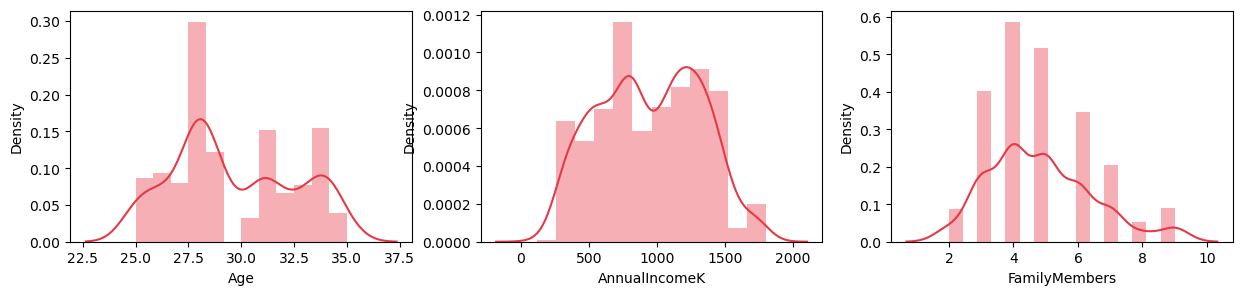

In [35]:
plt.figure(figsize=(15, 3))
i = 1
for col in numerical_columns:
    plt.subplot(1, 3, i)
    sns.distplot(df[col], color="#e63946")
    i+=1

### Plot de variables categoricas

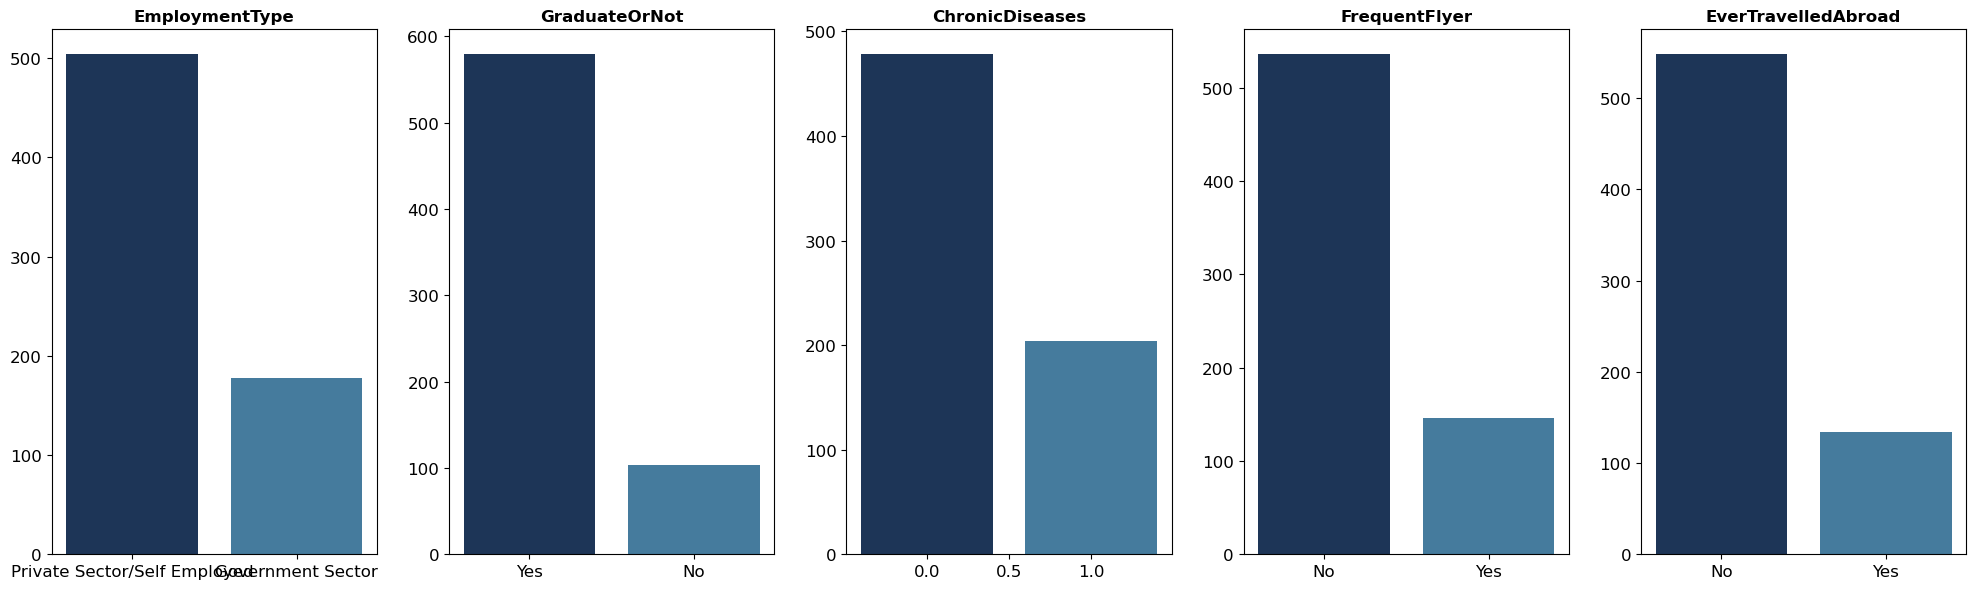

In [36]:
# Graficamos las ocurrencias de las variables categoricas
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(20, 6))

# Crear un gráfico de barras para cada variable categórica
for cada, column in enumerate(categorical_columns):
    # Contar las ocurrencias de cada valor
    counts = df[column].value_counts()

    # Crear el gráfico de barras
    ax[cada].bar(counts.index, counts.values,color=['#1d3557', '#457b9d'])


    ax[cada].set_title(column, fontsize=12, fontweight="bold")
    ax[cada].tick_params(labelsize=12)

# Ajustar los subplots
plt.tight_layout()

# Mostrar el gráfico
plt.show()


#### Observaciones: 
* La distribucion de valores en las variables categoricas se ve muy poco unifome. 
* Hay muchas personas con empleos privados mientras menos de la mitad tiene empleo publico.
* Marcada presencia de graduados y muy pocos sin estudios.
* Muchos que no son pasajeros frecuentes.
* La mayoria de las personas nunca viajaron al exterior.

### Grafico para ver relaciones y tendencias entre 2 variables

<Figure size 768x576 with 0 Axes>

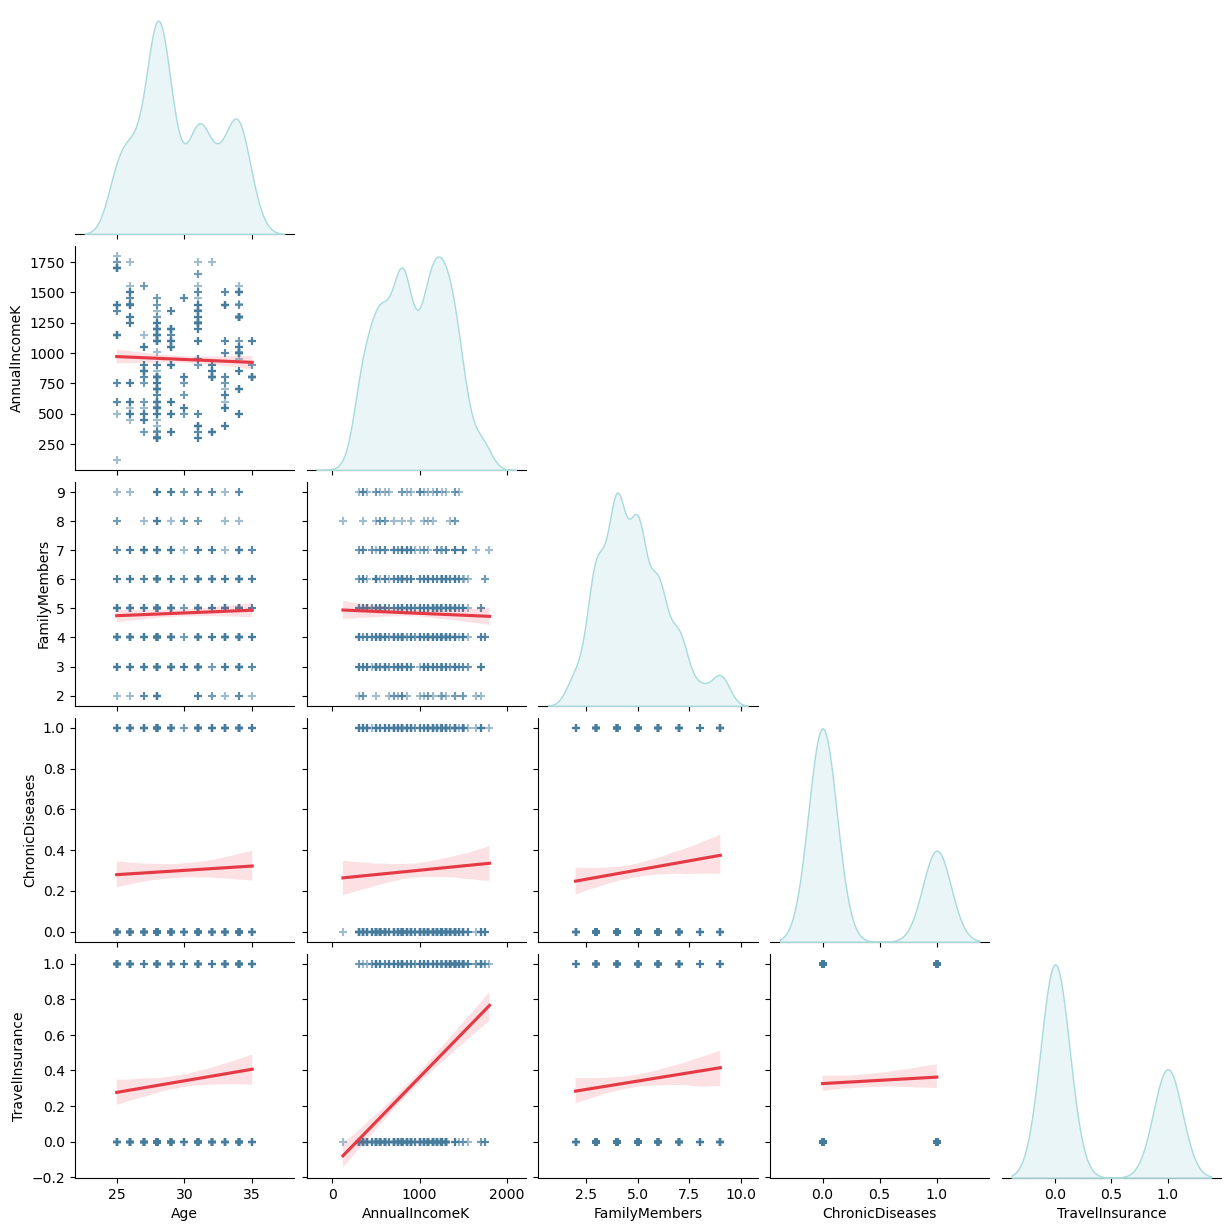

In [37]:
#Crear un Pairplot del dataset
plt.figure(dpi=120)
#sns.pairplot(df, color="#e63946")
#plt.show()

sns.pairplot(df, 
             markers="+",
                 kind='reg',
                 diag_kind="kde",
                 plot_kws={'line_kws':{'color':'#E63946'}, 
                           'scatter_kws': {'alpha': 0.5, 
                                           'color': '#457B9D'}},
                 corner=True,
                 diag_kws= {'color': '#A8DADC'})


plt.show()

#### Notas: 
* Los graficos de la diagonal (de color gris) se refiere a cada uno de los analisis univariado de todas las variables
* La linea roja indica la tendencia en la relacion.

# Analisis Bivariado

### Hay un perfil tipo de persona que compra el seguro?

Hacemos un análisis de penetración consistente en tomar la variable target y analizarla paso a paso con el resto de variables que nos sean útiles para encontrar info relevante. 

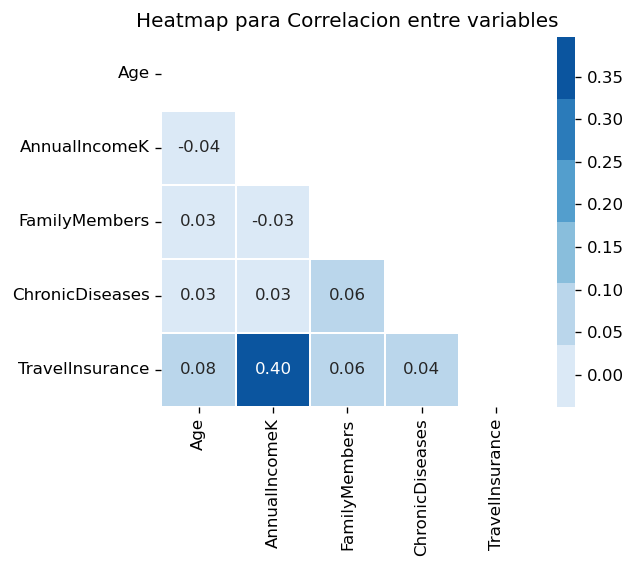

In [38]:
# Busco Correlaciones
plt.figure(dpi = 120,figsize= (5,4))
mask = np.triu(np.ones_like(df.corr(),dtype = bool))

colormap = sns.color_palette("Blues")
sns.heatmap(df.corr(),mask = mask, fmt = ".2f",annot=True,lw=1,cmap = colormap)

plt.yticks(rotation = 0)
plt.xticks(rotation = 90)

plt.title('Heatmap para Correlacion entre variables', fontsize=12)
plt.show()

#### Lectura del grafico
* Se ve que la relacion mas relevante y positiva es entre AnnualIncomeK Y TravelInsurance (0.40).
* En segundo lugar se detecta una relacion muy suve y negativa entre AnnualIncomeK y Age.

In [39]:
# Analizo AnnualIncomeK con TravelInsurance
# Observacion: al ser una variable numerica vs una categorica, uso grafico de boxplot

In [40]:
df.groupby('TravelInsurance')["AnnualIncomeK"].mean()

TravelInsurance
0     843.571104
1    1156.024057
Name: AnnualIncomeK, dtype: float64

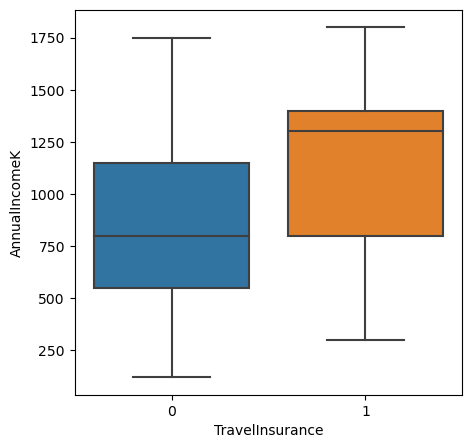

In [41]:
plt.figure(figsize=(5,5))
sns.boxplot(y='AnnualIncomeK', x='TravelInsurance', data=df)

plt.show()


#### Observaciones: 
* El valor de AnnualIncomeK medio (mediana) para los que han sacado un seguro de viajes, se acerca al doble del mismo valor para los q no han sacado seguro de viaje.
* Mientras que el salario maximo (AnnualIncomeK) de las dos categorias es similar, en el minimo se ve una diferencia de 200k aprox.
* No hay presencia de outliers (valores fuera de lo comun)


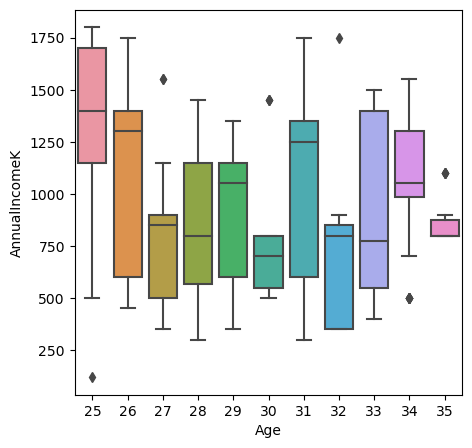

In [42]:
#Analizo AnnualIncomeK con Age
plt.figure(figsize=(5,5))
sns.boxplot(y='AnnualIncomeK', x='Age', data=df)
plt.show()

#### Observaciones: 
* Se obverva varios outliers, pero dado que se considera que la edad no es el unico parametro que define el sueldo, no se le da relevancia.
* El valor de AnnualIncomeK maximo se da para la poblacion de 25 años, siendo incluso su valor medio mas alto que los maximos de las otras edades.
* Sorprende la distribucion de esta observacion por lo poco consistente, sobre todo que las personas con 35 años sean los que menos salario reciban.


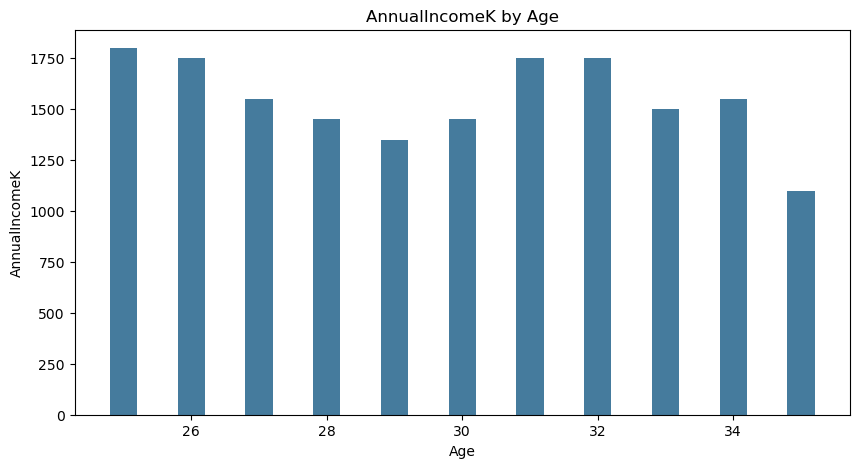

In [43]:
#Analizo AnnualIncomeK con Age usando grafico de  barras para una lectura mas completa
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(df['Age'], df['AnnualIncomeK'], color ='#457B9D', width = 0.4)
 
plt.xlabel("Age")
plt.ylabel("AnnualIncomeK")
plt.title("AnnualIncomeK by Age")
plt.show()

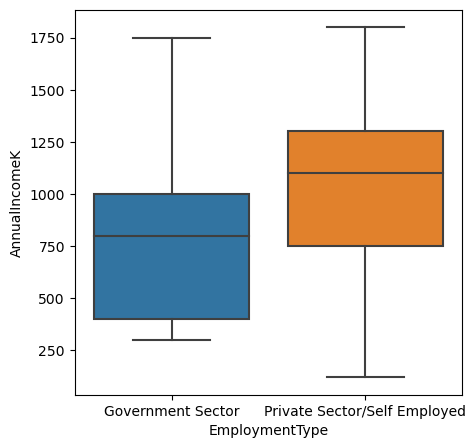

In [44]:
#Analizo AnnualIncomeK con EmploymentType usando boxplot
plt.figure(figsize=(5,5))
sns.boxplot(y='AnnualIncomeK', x='EmploymentType', data=df)
plt.show()

#### Observaciones: 

* Los valores de AnnualIncomeK para la poblacion del sector privado, supera claramente a los trabajadores del sector del gobierno.
* Incluso el valor medio es mas alto que los maximos de la categoria gobierno.
* No se obvervan outliers.

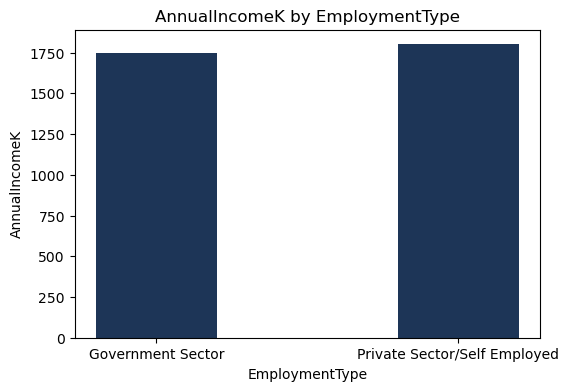

In [45]:
#Analizo AnnualIncomeK con EmploymentType usando barras

fig = plt.figure(figsize = (6, 4))
 
# creating the bar plot
plt.bar(df['EmploymentType'], df['AnnualIncomeK'], color ='#1D3557', width = 0.4)
 
plt.xlabel("EmploymentType")
plt.ylabel("AnnualIncomeK")
plt.title("AnnualIncomeK by EmploymentType")
plt.show()

#### Observaciones: 

* En este grafico se ve que los valores de AnnualIncomeK del sector privado superan a los trabajadores del sector del gobierno, pero no por tanto margen.


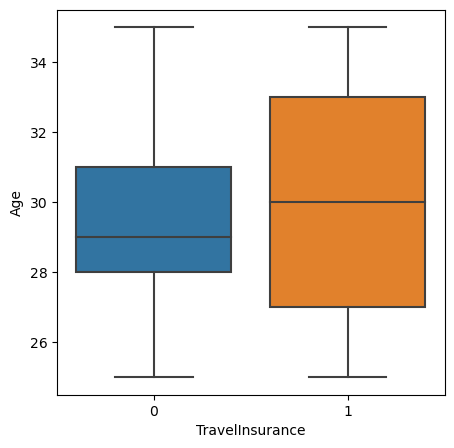

In [46]:
#Analizo TravelInsurance con Age usando barras

plt.figure(figsize=(5,5))
sns.boxplot(x='TravelInsurance', y='Age', data=df)
plt.show()

#### Observaciones: 

* Los valores de TravelInsurance positivo, abarca cualqueir edad.
* No se obvervan outliers.

In [47]:
#Analizo EmploymentType con FrequentFlyer (dos variables categoricas)

In [48]:
df.groupby(['EmploymentType']).count()['FrequentFlyer']

EmploymentType
Government Sector               178
Private Sector/Self Employed    504
Name: FrequentFlyer, dtype: int64

<Axes: xlabel='EmploymentType'>

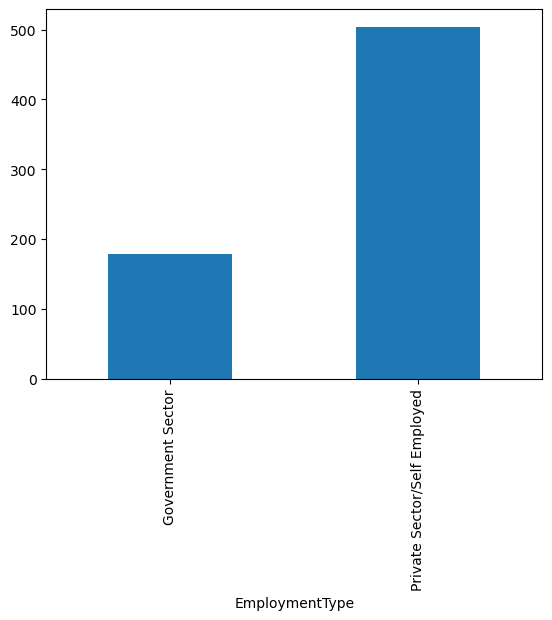

In [49]:
df.groupby(['EmploymentType']).count()['FrequentFlyer'].plot.bar()

In [50]:
# Se observa que la poblacion con empleo privado que es pasajero frecuente, es 3 veces mas grande que la de empleo publico.

<Axes: xlabel='EmploymentType'>

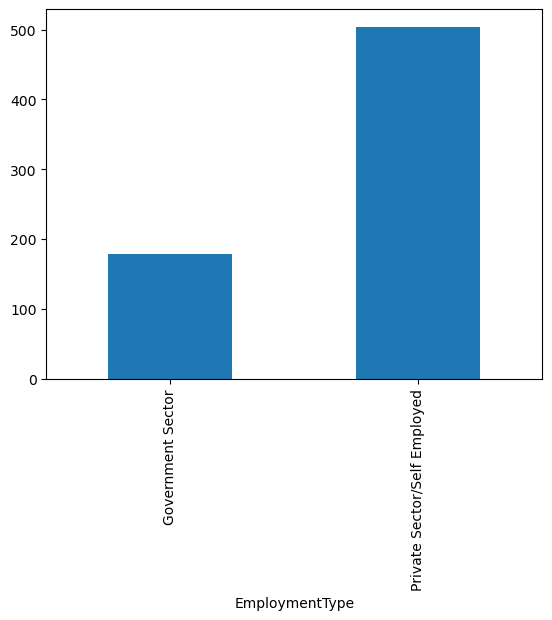

In [51]:
df.groupby(['EmploymentType']).count()['TravelInsurance'].plot.bar()

<Axes: xlabel='FrequentFlyer'>

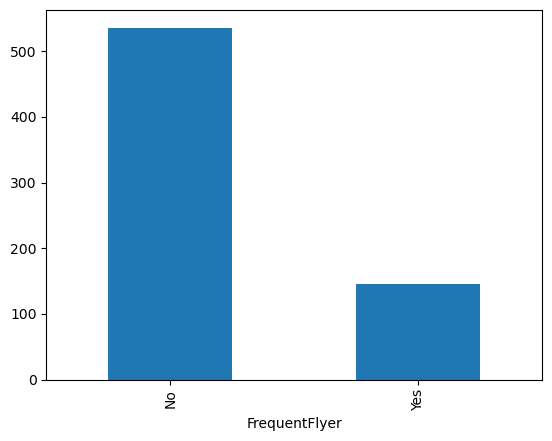

In [52]:
df.groupby(['FrequentFlyer']).count()['TravelInsurance'].plot.bar()

# Analisis bivariado respecto el valor objetivo

In [53]:
# mapeo los valores Y, para graficar las variables numericas y categoricas
TravelInsurance_0 = df[df['TravelInsurance'] == 0]
TravelInsurance_1 = df[df['TravelInsurance'] == 1]

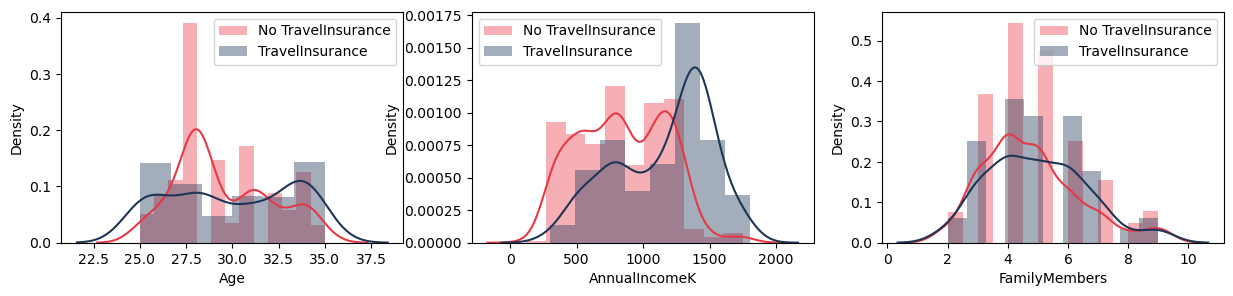

In [69]:
#variables numericas
plt.figure(figsize=(15, 3))
i = 1
for col in numerical_columns:
    plt.subplot(1, 3, i)
    sns.distplot(TravelInsurance_0[col], label='No TravelInsurance' , color='#E63946')
    sns.distplot(TravelInsurance_1[col], label='TravelInsurance', color='#1D3557')
    plt.legend()
    i+=1

#### Analisis respecto al valor de Y

Considerando las variables numericas y el valor de Y, revela lo siguiente:
* La poblacion de 27 años tiene poca propension a comprar un seguro de viaje, mientras que los mayores a 30, son sutilmente mas propensos.
* La contratacion de seguro crece sustancialmente ente la poblacion que gana mas de 1,2M, mienrtas que disminuye para los que cobran 1.8M.
* No se identifica un patron claro relativo a la cantidad de miembros de la familia.

In [55]:
# Analizo el impacto de cada Variable categorica con el valor objetivo

In [56]:
categorical_columns

['EmploymentType',
 'GraduateOrNot',
 'ChronicDiseases',
 'FrequentFlyer',
 'EverTravelledAbroad']

In [57]:
df.head()

,Age,EmploymentType,GraduateOrNot,AnnualIncomeK,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,25,Government Sector,Yes,750.478,5,0,Yes,No,0
1,25,Government Sector,Yes,750.121,3,0,No,No,0
2,25,Government Sector,Yes,750.419,4,0,No,No,1
3,25,Private Sector/Self Employed,No,1150.394,4,0,No,No,0
4,25,Private Sector/Self Employed,No,1150.109,5,0,No,No,0


In [58]:
# Mapeo de variables booleanas

In [59]:
df['EmploymentType'] = df['EmploymentType'].map({'Government Sector': 0, 'Private Sector/Self Employed': 1})
df['GraduateOrNot'] = df['GraduateOrNot'].map({'No': 0, 'Yes': 1})
df['FrequentFlyer'] = df['FrequentFlyer'].map({'No': 0, 'Yes': 1})
df['EverTravelledAbroad'] = df['EverTravelledAbroad'].map({'No': 0, 'Yes': 1})


In [60]:
df.head()

,Age,EmploymentType,GraduateOrNot,AnnualIncomeK,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,25,0,1,750.478,5,0,1,0,0
1,25,0,1,750.121,3,0,0,0,0
2,25,0,1,750.419,4,0,0,0,1
3,25,1,0,1150.394,4,0,0,0,0
4,25,1,0,1150.109,5,0,0,0,0


In [61]:
# re mapeo los valores Y, porque cambie los valores en las variables categorias al mapear
TravelInsurance_0 = df[df['TravelInsurance'] == 0]
TravelInsurance_1 = df[df['TravelInsurance'] == 1]

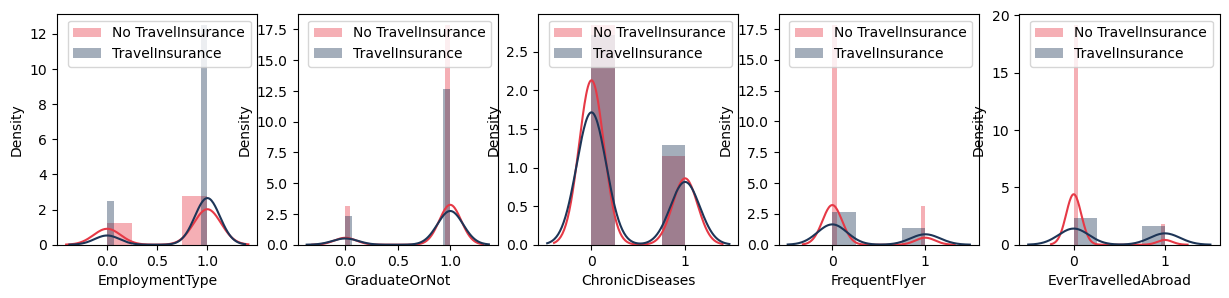

In [68]:
#variables categoricas
plt.figure(figsize=(15, 3))
i = 1
for col in categorical_columns:
    plt.subplot(1, 5, i)
    sns.distplot(TravelInsurance_0[col], label='No TravelInsurance' , color='#E63946')
    sns.distplot(TravelInsurance_1[col], label='TravelInsurance', color='#1D3557')
    plt.legend()
    i+=1

#### Observaciones: 
*     La distribucion de valores en las variables categoricas respecto a la variable objetivo, se nota que la poblacion mas propensa a comprar el seguro tiene las siguientes caracteristicas: personas con empleados privados, graduados, que no son pasajeros frecuentes y nunca viajaron al exterior.

In [71]:
#Función que se encarga de realizar un gráfico por cada columna que se proporcione como argumento seguido del titulo que corresponda
def analisis_variable (columna, titulo_plt):
    analisis = df.groupby(columna).TravelInsurance.mean().sort_values(ascending = False) * 100
    analisis.plot.bar(color = '#457B9D');
    plt.title(titulo_plt)

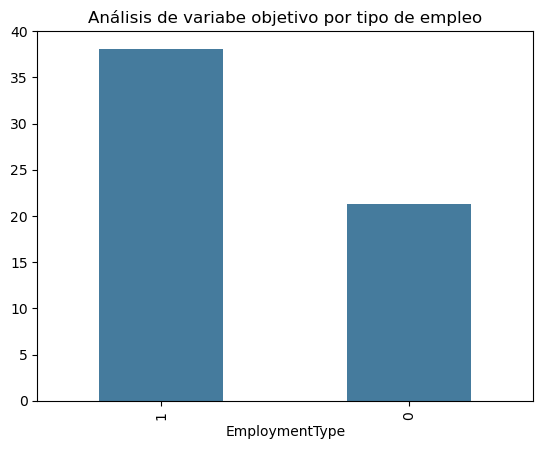

In [75]:
# Analisis por tipo de empleo
analisis_variable('EmploymentType', 'Análisis de variabe objetivo por tipo de empleo')

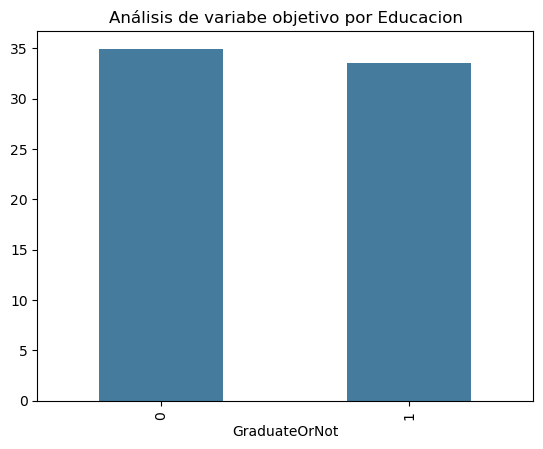

In [76]:
# Analisis por Educacion
analisis_variable('GraduateOrNot', 'Análisis de variabe objetivo por Educacion')

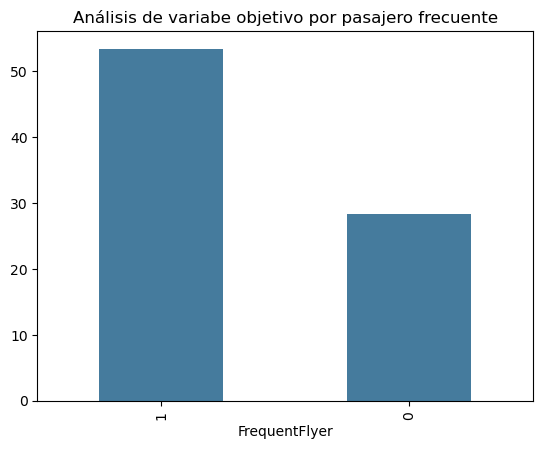

In [77]:
# Analisis por frecuente
analisis_variable('FrequentFlyer', 'Análisis de variabe objetivo por pasajero frecuente')

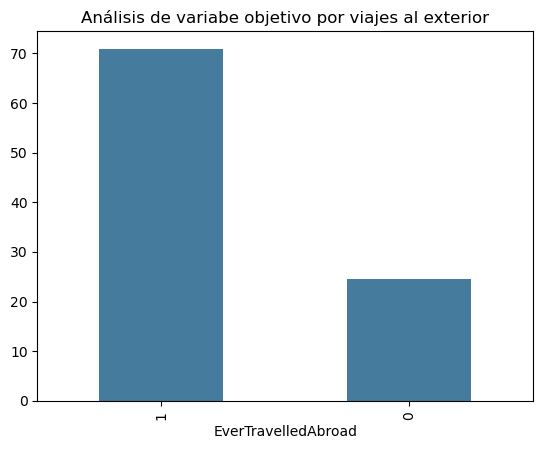

In [78]:
# Analisis por viajes al exterior
analisis_variable('EverTravelledAbroad', 'Análisis de variabe objetivo por viajes al exterior')

In [80]:
# Para na lectura mas completa, hago un boxplot de cada variable numerica respecto a la variable objetivo

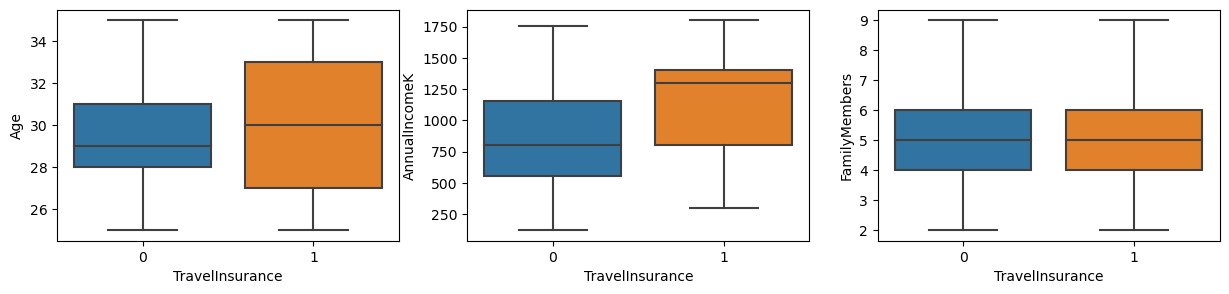

In [83]:
plt.figure(figsize=(15, 3))
i = 1
for col in numerical_columns:
    plt.subplot(1, 3, i)
    sns.boxplot(data=df, x=df['TravelInsurance'], y=df[col])
    i+=1

# Analisis multivariado

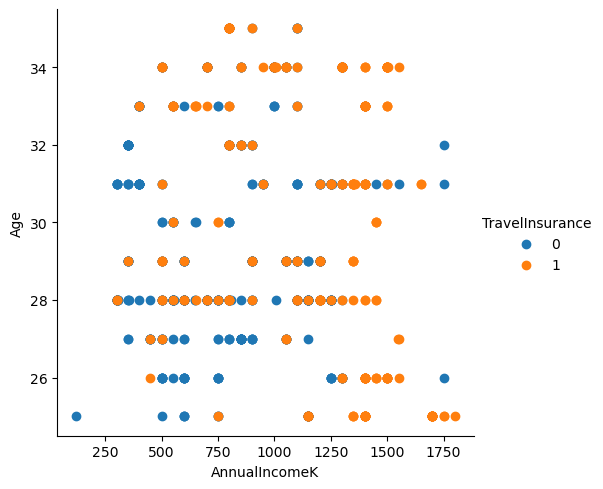

In [87]:
#FacetGrid - AnnualIncomeK vs Age segun TravelInsurance 
sns.FacetGrid(df, hue = 'TravelInsurance' , height = 5).map(plt.scatter,'AnnualIncomeK','Age').add_legend();
plt.show()


#### Observaciones del Facetgrid: Age, AnnualIncomeK by TravelInsurance
* Se nota una mayor cantidad de personas que contratan seguro, entre la poblacion mayor o igual a 28 años
* Tambien se advierte una mayore presencia de positivos entre la poblacion que tiene ingreso anual mayor a 1000K

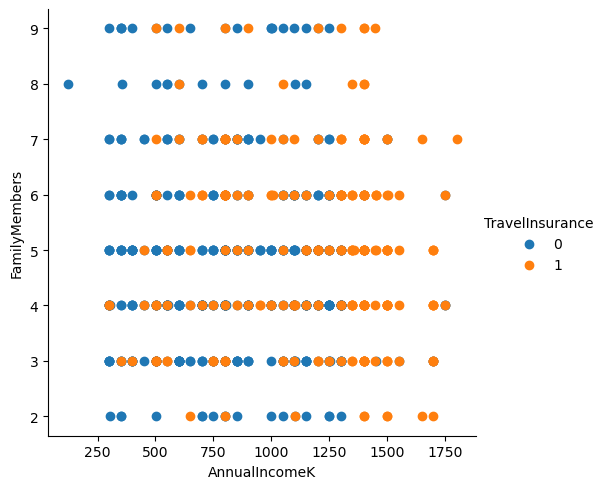

In [86]:
#FacetGrid - AnnualIncomeK vs FamilyMembers segun TravelInsurance
sns.FacetGrid(df, hue = 'TravelInsurance' , height = 5).map(plt.scatter,'AnnualIncomeK','FamilyMembers').add_legend();
plt.show()

#### Observaciones del Facetgrid: FamilyMembers, AnnualIncomeK by TravelInsurance
* Se nota una mayor cantidad de personas que contratan seguro, entre la poblacion que tiene 4 miembros de familia.
* En menor medida, los que tienen 3 o 5 miembros, y un ingreso anual mayor a 750K

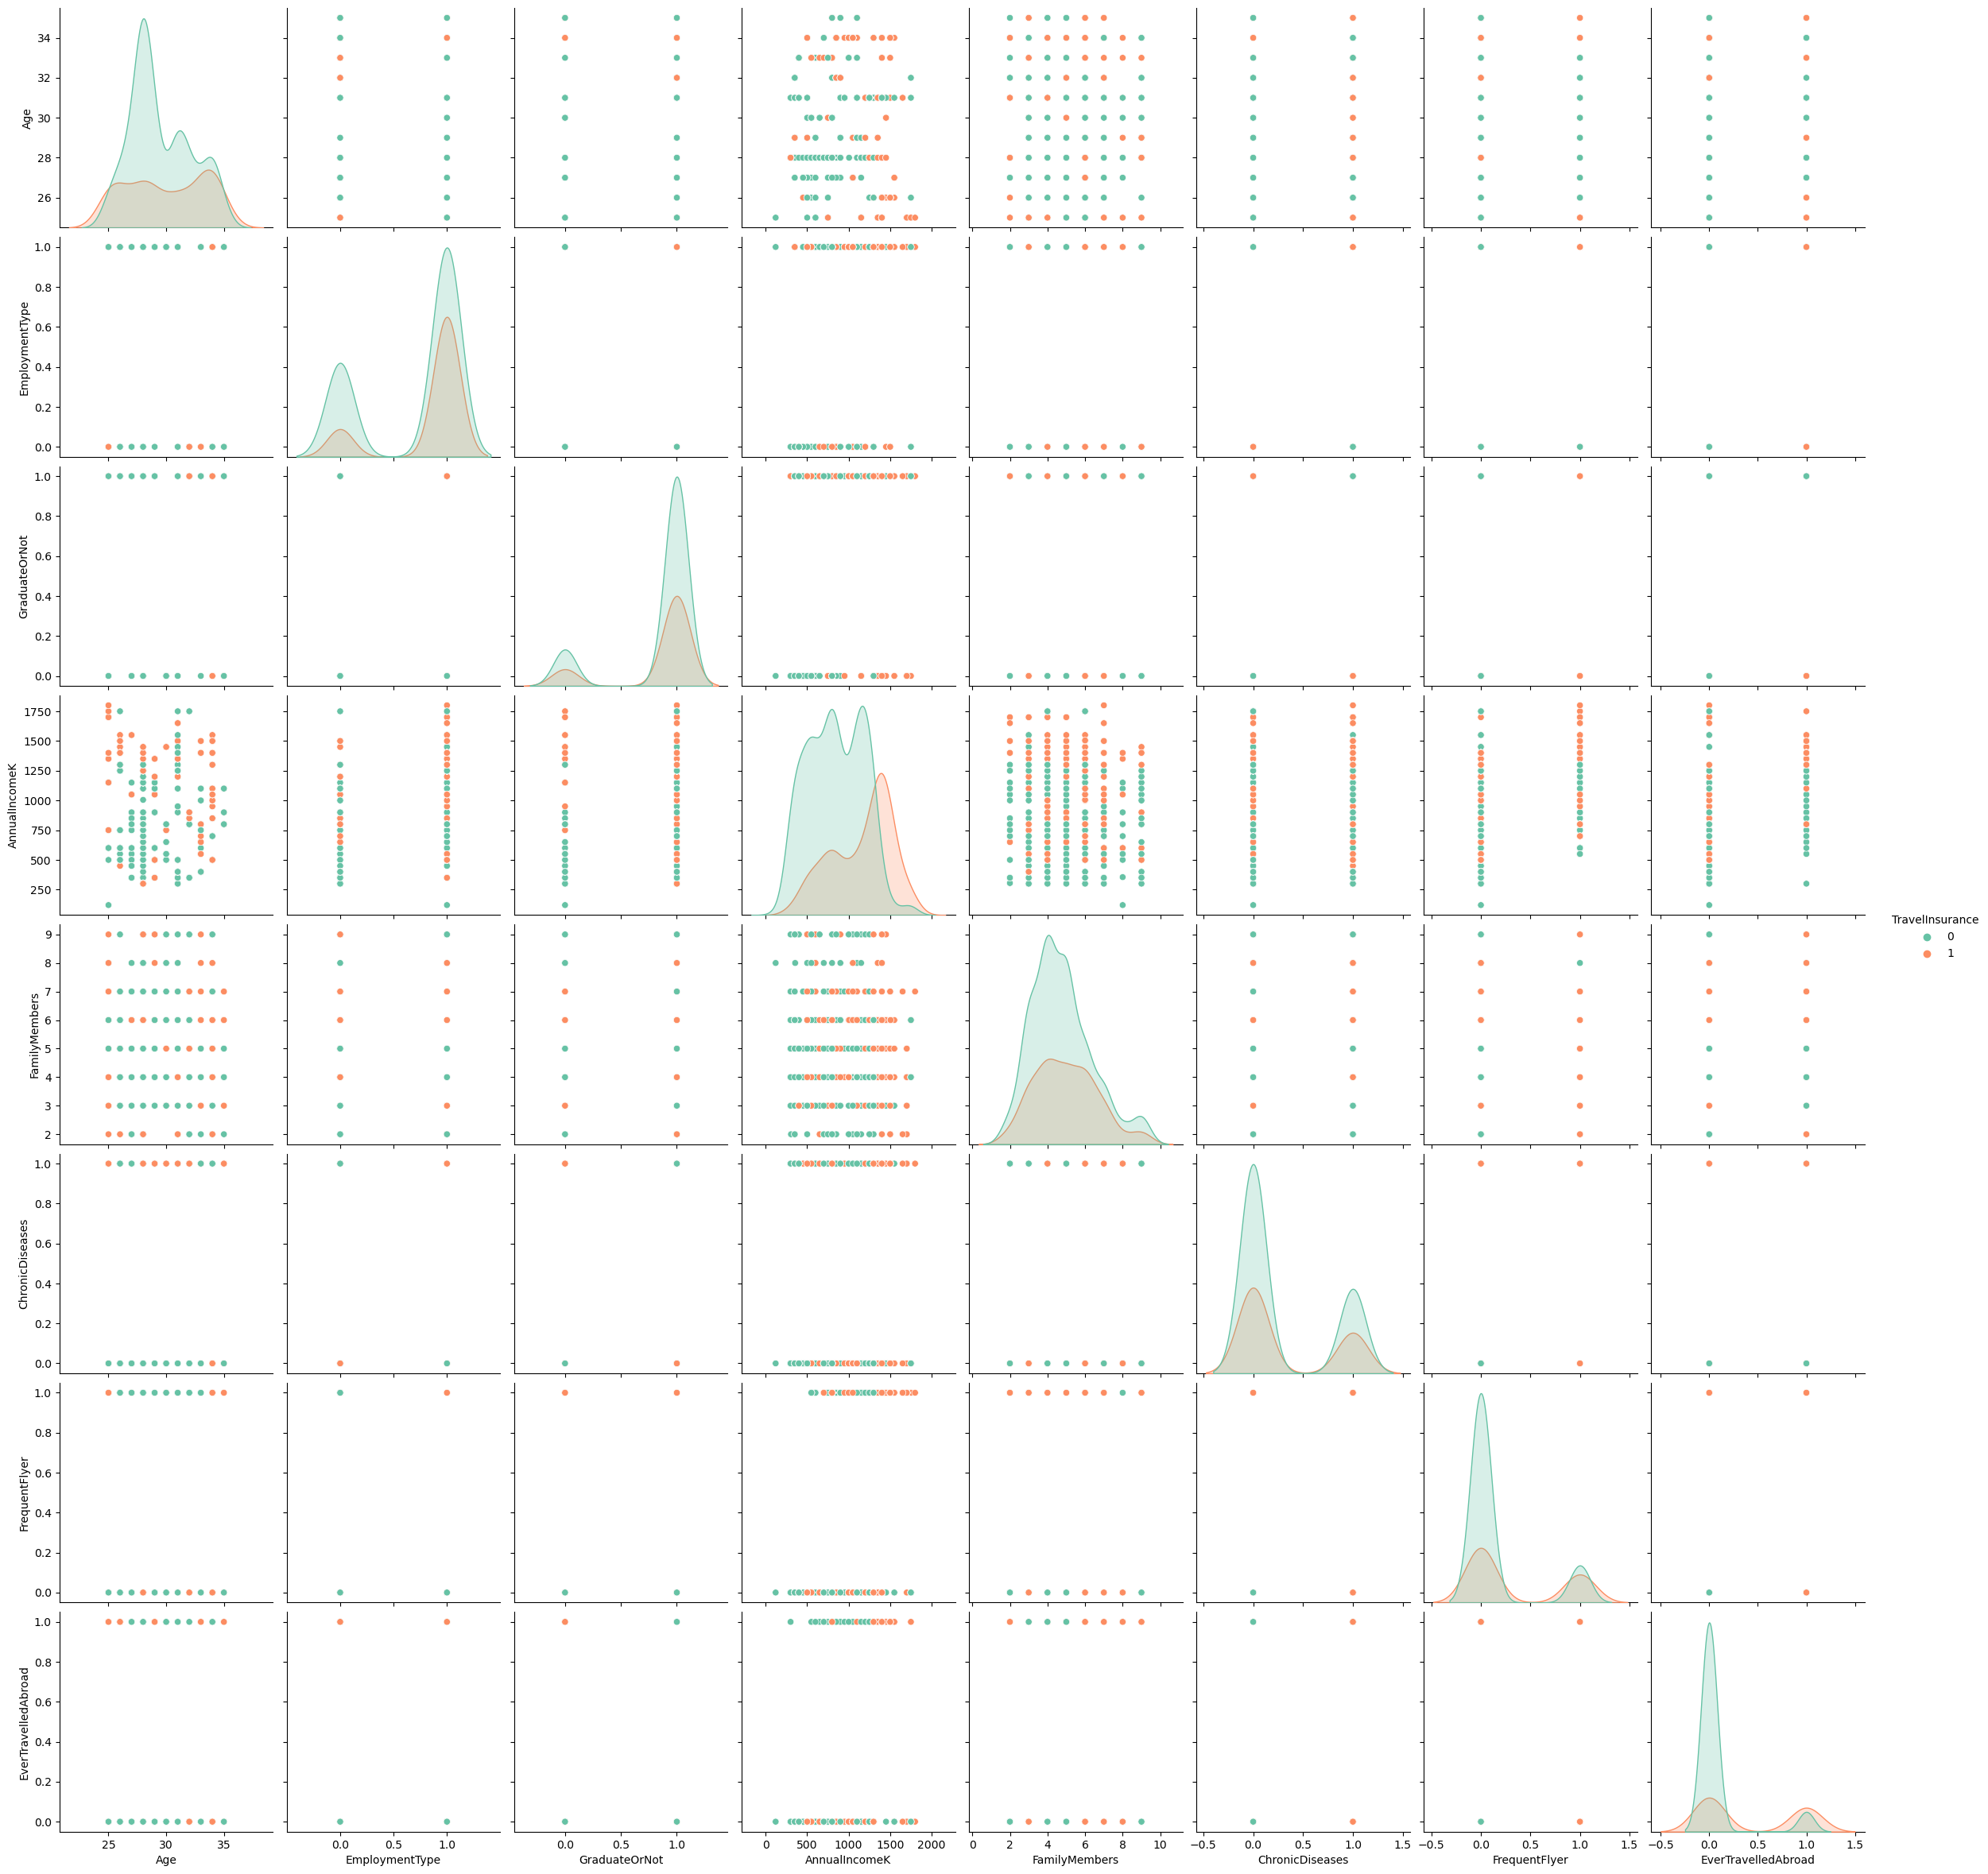

In [88]:
#Pairplot con hue por variable objetivo.

sns.pairplot(df,hue = 'TravelInsurance' , height = 3 , palette = 'Set2')
plt.show()

<Axes: xlabel='EmploymentType,FrequentFlyer,TravelInsurance'>

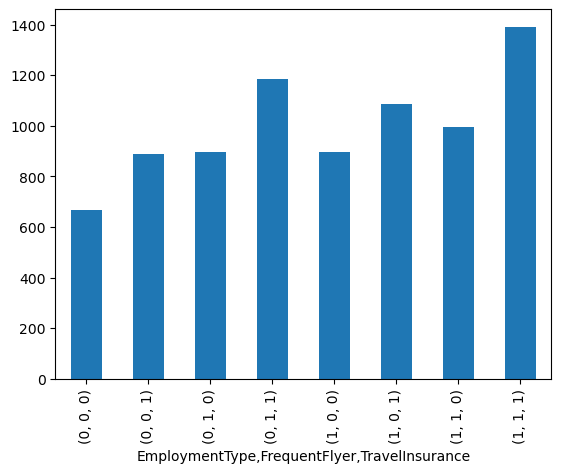

In [89]:
df.groupby(['EmploymentType','FrequentFlyer', 'TravelInsurance']).mean()['AnnualIncomeK'].plot.bar(stacked=True)

# FASE DE MACHINE LEARNING

Para el analisis que vamos a realizar ya contamos con la variable objetivo, que es la variable booleana "TravelInsurance"
y esa es la respuesta a lo que queremos saber.
Con la informacion histórica de compradores de paquetes de viajes, intentaremos realizar predicciones sobre si un futuro cliente 
contratará o no el seguro de viajes. 
Por eso se elije la rama de clasificación dentro de los algoritmos de aprendizaje supervisado, ya que queremos clasificar a los clientes como "comprador de seguros" o "no comprador de seguros". 
De este modo, entendemos que se trata de un problema de clasificacion binaria.

Por ultimo, lo que se buscara mejorar las metricas precision y accuracy del conjunto de test, al realizar el manejo de los hiperparametros de los algoritmos. Tambien se buscara la disminucion del overfitting.


In [96]:
!pip install shap
!pip install graphviz
#!pip install xgboost

#Imports necesarios
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import precision_score,accuracy_score,recall_score,f1_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.tree import export_graphviz
import graphviz
# import xgboost
import time
import shap
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import StratifiedKFold
from sklearn.experimental import enable_halving_search_cv 
from sklearn.model_selection import HalvingRandomSearchCV,HalvingGridSearchCV
import warnings
warnings.filterwarnings('ignore')

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [97]:
# copio el dataset

df_ml = df.copy()

In [98]:
# 1) Separo la variable target del dataframe ('TravelInsurance')

x = df_ml.drop(['TravelInsurance'], axis=1) 
y = df_ml['TravelInsurance'] 

### Separacion de grupos: train y test

In [99]:
# Se separará entre grupos de entrenamiento y testeo (ambos x e y)
# la proporción que se elige es 70% para train y 30% para test. 
# A su vez, para lograr mantener la proporción existente en las respuestas de satisfacción, tanto en train como en test, lo que se hace es usar stratify que me permite lograr esto. 
# También se utiliza el random_state con la finalidad de producir una semilla que permita que los resultados se puedan replicar.

rng = np.random.RandomState(60)
xentrenamiento, xtesteo, yentrenamiento, ytesteo = train_test_split(x, y, test_size=0.30, random_state=rng,stratify=y) 

### Algoritmos de Clasificacion

In [157]:
# Modelos a desarrollar

#arrays auxiliares
# listado_modelos=['Arbol de decisión','Naive bayes','Regresión logistica','Random Forest','Gradient Boosting classifier','Linear discriminant analysis','XGBOOST','AdaBoostClassifier']
# listado_modelos=['Arbol de decisión','Naive bayes','Regresión logistica','Random Forest','Gradient Boosting classifier','Linear discriminant analysis','AdaBoostClassifier']
listado_modelos=['Arbol de decisión','Regresión logistica','Random Forest']

# modelos = [
#           DecisionTreeClassifier(max_depth=7,random_state=rng,splitter='random'),
#           GaussianNB(), 
#           LogisticRegression(max_iter=11000, n_jobs=-1,random_state=rng),                
#           RandomForestClassifier(random_state=rng,n_estimators=20,max_depth=6),
#           GradientBoostingClassifier(n_estimators=9, max_depth=6, random_state=rng,min_samples_split=45),
#           LinearDiscriminantAnalysis(), 
           #xgboost.XGBClassifier(objective='binary:logistic',n_estimators=10,seed=42,max_depth=6,random_state=rng),
#           AdaBoostClassifier(n_estimators=15, random_state=rng)
#          ]

modelos = [
           DecisionTreeClassifier(max_depth=7,random_state=rng,splitter='random'),         
           LogisticRegression(max_iter=11000, n_jobs=-1,random_state=rng),                
           RandomForestClassifier(random_state=rng,n_estimators=20,max_depth=6),
         ]

### Metricas

In [158]:
#Metricas resultantes de las predicciones
metricas_modelos=pd.DataFrame(columns=['modelo','precision_test','precision_entrenamiento','accuracy_test','accuracy_entrenamiento','recall_test','recall_entrenamiento','f1_test','f1_entrenamiento'])


tiempos_entrenamiento=[]


#Funciones Auxiliares
def matriz_confusion(ytesteo, yprediccion_testeo, modelo, label):
  confusion = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(ytesteo, yprediccion_testeo),display_labels=label)
  fig, ax = plt.subplots(figsize=(3,3))
  confusion.plot(cmap="Blues",ax=ax)
  ax.set_title("Matriz de confusión de "+modelo+" (test): ")
  ax.set_xlabel ("Predicción")
  ax.set_ylabel ("Compra real")
  plt.show()

def importancia_feature(modelo,xentrenamiento):
  sorted_idx = modelo.feature_importances_.argsort()
  plt.figure(figsize=(6,6))
  plt.barh(xentrenamiento.columns[sorted_idx], modelo.feature_importances_[sorted_idx], color="#1D3557")
  plt.xlabel("Nivel de importancia")
  plt.legend(fontsize=10)
  plt.show()

def curva_roc(modelo,false_positive_rate1, true_positive_rate1):
  plt.subplots(1, figsize=(8,6))
  plt.title('Receiver Operating Characteristic - '+modelo)
  plt.plot(false_positive_rate1, true_positive_rate1)
  plt.plot([0, 1], ls="--")
  plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.show()

In [154]:
def imprimir_metricas(modelo, nombre_modelo):

  metricas_kfold=pd.DataFrame(columns=['modelo','precision','accuracy'])  
    
  print("Classification report de ", bolder(nombre_modelo), "(test)")
  print(classification_report(ytesteo,yprediccion_testeo,digits=7))

  
  print("------------------------------------------------------------------------------------------")
  print("Classification report de ", bolder(nombre_modelo), "(train)")
  print(classification_report(yentrenamiento,yprediccion_entrenamiento,digits=7))
  print("-------------------------------------------------------------------------------------------------------")

  #Matriz de confusión
  print("Matriz de confusion de ", bolder(nombre_modelo))
  matriz_confusion(ytesteo,yprediccion_testeo, nombre_modelo, ['No','Si'])
  print(confusion_matrix(ytesteo, yprediccion_testeo))  
  print("-------------------------------------------------------------------------------------------------------")

  # Feature importance
  if(nombre_modelo!='Naive bayes' and nombre_modelo!='Regresión logistica' and nombre_modelo!='Linear discriminant analysis'):
    print("Feature Importance de ", bolder(nombre_modelo))
    importancia_feature(modelo,xentrenamiento)
  
  #Curva ROC
  # Calculo de tasas 
  print("Curva ROC ", bolder(nombre_modelo))  
  false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(ytesteo, proba1)
  print('roc_auc_score: ', roc_auc_score(ytesteo, proba1))
  curva_roc(nombre_modelo,false_positive_rate1, true_positive_rate1)

  #Cross-validation
  print("Cross-validation K-fold ", bolder(nombre_modelo))   
  cv_results = cross_val_score(modelo, x, y, cv=10, scoring='accuracy')
  print('Accuracy: %.3f (%.3f)' %(np.mean(cv_results), np.std(cv_results)))
  
  print("Stratified K-Fold ", bolder(nombre_modelo)) 
  list_ac=[]
  list_pre=[]
  for h in range(0,skf.get_n_splits(x, y)):
        
    # Calculo de indices
    train, test = list(skf.split(x, y))[h]
    
    # Separar train y test
    X_train_n, y_train_n, X_test_n, y_test_n= x.iloc[train], y.iloc[train], x.iloc[test],y.iloc[test]
    
    # Ajustar el modelo
    modelo.fit(X_train_n, y_train_n)
    
    # Predicciones
    pred= modelo.predict(X_test_n)
    
    # Calculo del error
    accuracy= accuracy_score(y_true=y_test_n, y_pred= pred)
    precision= precision_score(y_true=y_test_n, y_pred= pred)
    print('Iteracion: ',h+1, ' Accuracy:', accuracy)
    print('Iteracion: ',h+1, ' Precision:', precision)
    list_ac.append(accuracy)
    list_pre.append(precision)
    
  # Promedio de accuracy
  print('Accuracy promedio:', np.mean(list_ac))
  print('Precision promedio:', np.mean(list_pre))

  metricas_kfold = metricas_kfold.append({
        'modelo':nombre_modelo,
        'precision':np.mean(list_pre) ,
        'accuracy':np.mean(list_ac)
        }, ignore_index=True)
    
  print("------------------------------------------------------------------------------------------------------------")
  print("------------------------------------------------------------------------------------------------------------")



#### Stratified K-fold:

In [103]:
skf = StratifiedKFold(n_splits=15, random_state=42, shuffle=True)
skf.get_n_splits(x, y)

15

In [159]:
# corro los modelos
i=0
for models, lista in zip(modelos, listado_modelos):

  #start y end los utilizo para contabilidar el tiempo de entrenamiento
  start = time.time()
  #entrena los modelos descriptos en el listado de modelos que utilizare
  modelo = models.fit(xentrenamiento,yentrenamiento)
  end = time.time()
  
  #Predicciones
  yprediccion_entrenamiento = modelo.predict(xentrenamiento)
  yprediccion_testeo = modelo.predict(xtesteo)

  #Guardo los resultados para despues poder realizar analisis
  tiempos_entrenamiento.append(end-start) 
  metricas_modelos = metricas_modelos.append({
        'modelo':lista,
        'precision_test':precision_score(ytesteo, yprediccion_testeo) ,
        'precision_entrenamiento':precision_score(yentrenamiento, yprediccion_entrenamiento),
        'accuracy_test':accuracy_score(ytesteo, yprediccion_testeo),
        'accuracy_entrenamiento':accuracy_score(yentrenamiento, yprediccion_entrenamiento),
        'recall_test':recall_score(ytesteo, yprediccion_testeo),
        'recall_entrenamiento':recall_score(yentrenamiento, yprediccion_entrenamiento),
        'f1_test':f1_score(ytesteo, yprediccion_testeo),
        'f1_entrenamiento':f1_score(yentrenamiento, yprediccion_entrenamiento)
        }, ignore_index=True)
  

In [160]:
def bolder (texto):
    return "\033[1m" + texto + "\033[0m"

### Classification Report
El "Classification Report" es una métrica que generalmente se utiliza en problemas de aprendizaje supervisado, específicamente en tareas de clasificación. 
El "Classification Report" es una herramienta útil para evaluar el rendimiento de un modelo de clasificación en varias clases. Proporciona una descripción detallada de las métricas de rendimiento, como precisión, recall, f1-score y soporte, para cada clase individual y para el conjunto de datos en general.
A continuación, describiré brevemente estas métricas:

1. Precisión (Precision): Es la proporción de instancias correctamente clasificadas de una clase específica con respecto a todas las instancias que el modelo clasificó en esa clase. Una alta precisión significa que el modelo hace pocas falsas alarmas al clasificar una instancia en esa clase.

2. Recall (Sensibilidad o Recall): Es la proporción de instancias correctamente clasificadas de una clase específica con respecto a todas las instancias reales que pertenecen a esa clase. Un alto recall significa que el modelo identifica correctamente la mayoría de las instancias de esa clase.

3. F1-score: Es una medida que combina precisión y recall. Está diseñada para encontrar un equilibrio entre ambas métricas, ya que algunas veces una alta precisión puede ir acompañada de un bajo recall, y viceversa. El F1-score es especialmente útil cuando las clases están desequilibradas.

4. Soporte (Support): Es el número de instancias reales que pertenecen a cada clase. El soporte es útil para evaluar el desequilibrio de clases y cómo se distribuyen las instancias en el conjunto de datos.

In [161]:
# nombre de modelos
listado_modelos


['Arbol de decisión', 'Regresión logistica', 'Random Forest']

In [162]:
# key demodelos
modelos

[DecisionTreeClassifier(max_depth=7,
                        random_state=RandomState(MT19937) at 0x1D13B953740,
                        splitter='random'),
 LogisticRegression(max_iter=11000, n_jobs=-1,
                    random_state=RandomState(MT19937) at 0x1D13B953740),
 RandomForestClassifier(max_depth=6, n_estimators=20,
                        random_state=RandomState(MT19937) at 0x1D13B953740)]

# Arbol de Desicion

Classification report de  Arbol de decisión (test)
              precision    recall  f1-score   support

           0  0.8441558 0.9558824 0.8965517       136
           1  0.8823529 0.6521739 0.7500000        69

    accuracy                      0.8536585       205
   macro avg  0.8632544 0.8040281 0.8232759       205
weighted avg  0.8570124 0.8536585 0.8472246       205

------------------------------------------------------------------------------------------
Classification report de  Arbol de decisión (train)
              precision    recall  f1-score   support

           0  0.8047493 0.9651899 0.8776978       316
           1  0.8877551 0.5403727 0.6718147       161

    accuracy                      0.8218029       477
   macro avg  0.8462522 0.7527813 0.7747563       477
weighted avg  0.8327660 0.8218029 0.8082069       477

-------------------------------------------------------------------------------------------------------
Matriz de confusion de  Arbol de decisión


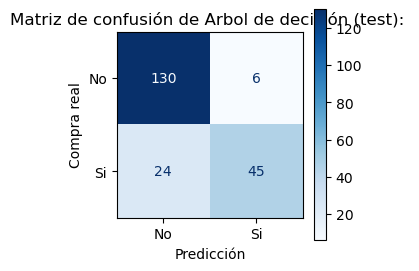

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[[130   6]
 [ 24  45]]
-------------------------------------------------------------------------------------------------------
Feature Importance de  Arbol de decisión


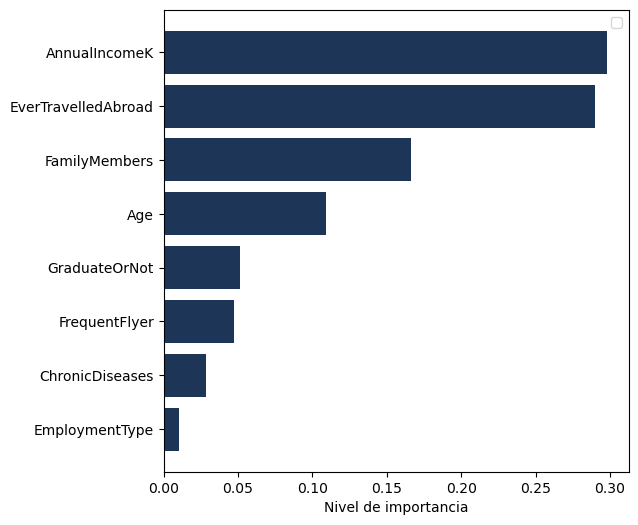

Curva ROC  Arbol de decisión
roc_auc_score:  0.8281116794543905


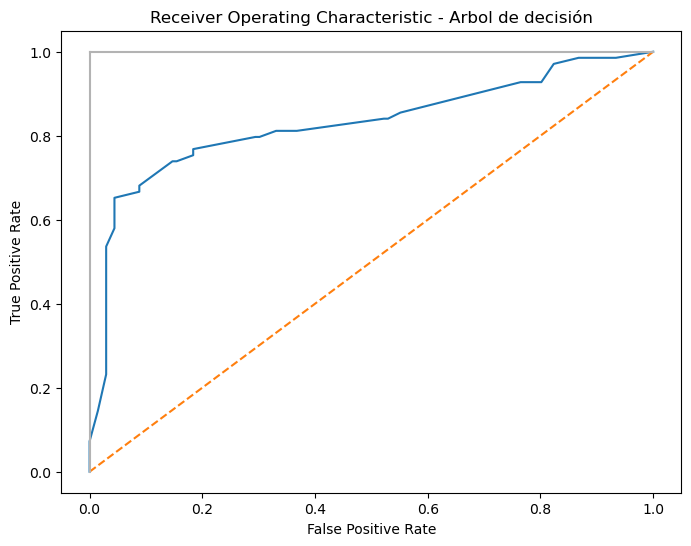

Cross-validation K-fold  Arbol de decisión
Accuracy: 0.670 (0.155)
Stratified K-Fold  Arbol de decisión
Iteracion:  1  Accuracy: 0.8260869565217391
Iteracion:  1  Precision: 0.7058823529411765
Iteracion:  2  Accuracy: 0.8043478260869565
Iteracion:  2  Precision: 0.75
Iteracion:  3  Accuracy: 0.8043478260869565
Iteracion:  3  Precision: 0.8181818181818182
Iteracion:  4  Accuracy: 0.8043478260869565
Iteracion:  4  Precision: 1.0
Iteracion:  5  Accuracy: 0.8043478260869565
Iteracion:  5  Precision: 1.0
Iteracion:  6  Accuracy: 0.8043478260869565
Iteracion:  6  Precision: 0.8181818181818182
Iteracion:  7  Accuracy: 0.8043478260869565
Iteracion:  7  Precision: 0.8181818181818182
Iteracion:  8  Accuracy: 0.8
Iteracion:  8  Precision: 0.75
Iteracion:  9  Accuracy: 0.7333333333333333
Iteracion:  9  Precision: 0.6666666666666666
Iteracion:  10  Accuracy: 0.8222222222222222
Iteracion:  10  Precision: 0.7692307692307693
Iteracion:  11  Accuracy: 0.8
Iteracion:  11  Precision: 1.0
Iteracion:  12  

In [155]:
# MODELADO CON: Arboles de Desicion
imprimir_metricas(modelos[0], listado_modelos[0])

## Comentarios de resultados del modelo Arbol de Desicion

### Observaciones sobre el Reporte de Classification

1. Precisión: Para el conjunto de prueba, la precisión para la clase 1 es del 88.24%, lo que indica que el modelo clasifica correctamente alrededor del 88.24% de las instancias positivas. Para el conjunto de entrenamiento, la precisión para la clase 1 es del 88.78%.

2. Recall: En el conjunto de prueba, el recall para la clase 1 es del 65.22%, lo que indica que el modelo identifica correctamente alrededor del 65.22% de las instancias reales de la clase positiva. Para el conjunto de entrenamiento, el recall para la clase 1 es del 54.04%.

3. F1-score: El F1-score es una medida que combina la precisión y el recall en una sola métrica. Es especialmente útil cuando las clases están desequilibradas. En el conjunto de prueba, el F1-score para la clase 1 es del 75.00%, mientras que en el conjunto de entrenamiento, es del 67.18%.

4. Exactitud (Accuracy): La exactitud es la proporción de instancias clasificadas correctamente (tanto positivas como negativas) con respecto a todas las instancias. En este caso, la exactitud para el conjunto de prueba es del 85.37%, lo que significa que el modelo clasifica correctamente alrededor del 85.37% de todas las instancias. Para el conjunto de entrenamiento, la exactitud es del 82.18%.

5. Macro AVG y Weighted AVG: Estas filas proporcionan el promedio de las métricas de precisión, recall y F1-score para ambas clases. El Macro AVG calcula el promedio sin tener en cuenta el desequilibrio de clases, mientras que el Weighted AVG tiene en cuenta el número de instancias en cada clase.

En general, el modelo muestra un rendimiento aceptable, pero parece tener un mejor desempeño para la clase 0 (negativa) en comparación con la clase 1 (positiva). Esto puede deberse a un desequilibrio en la distribución de clases (notado oportunamente la relacion 70/30) o a una mayor dificultad para el modelo en la clasificación de la clase 1. 
Capas sería útil investigar más a fondo el desequilibrio de clases y considerar técnicas de ajuste para abordar este problema, como la ponderación de clases o el uso de otros algoritmos de clasificación más adecuados para el problema en cuestión.

### Observaciones sobre la matriz de confusión
La matriz de confusión muestra un modelo con 130 verdaderos positivos (VP) y 45 verdaderos negativos (VN), lo que indica una buena capacidad para clasificar correctamente ambas clases. Sin embargo, también tiene 24 falsos negativos (FN) y 6 falsos positivos (FP), lo que indica ciertas dificultades en la clasificación precisa de la clase positiva. Es importante analizar el equilibrio entre precisión y recall para mejorar la capacidad de identificar instancias positivas.

### Observaciones del grafico de Featured Importance
Este grafico ayuda a entender la importancia relativa de cada característica (feature) utilizada por el modelo para realizar las decisiones de clasificación. 
La interpretación de este gráfico proporciona información valiosa sobre qué características tienen un mayor impacto en la predicción del modelo y cuáles son las más relevantes para el problema en cuestión. 
En este caso se observa que las caracteristicas mas relavantes son: EverTravelledAbroad, AnnualIncomeK, en 2do lugar las siguen: Age y FamilyMembers.
El resto de las variabls se identifican como poco relevantes.

### Observaciones de la Curva ROC
Esta curva representa la tasa de verdaderos positivos (Sensibilidad o Recall) frente a la tasa de falsos positivos (1 - Especificidad) para diferentes umbrales de clasificación.

La AUC-ROC es un número que representa el área bajo la Curva ROC. Cuanto mayor sea el valor de AUC-ROC (con un máximo de 1), mejor es el rendimiento del modelo en general. Un valor de 0.5 significa que el modelo tiene un rendimiento similar al azar, mientras que un valor cercano a 1 indica que el modelo tiene una alta capacidad de discriminación entre las clases.

Dado que nuestro valor de roc_auc_score es 0.8281116794543905, indica que el rendimiento del modelo es bueno en general.

viendo mas en detalle, el grafico muestra una gran sensibilidad para identificar correctamente ejemplos positivos (instancias pertenecientes a la clase positiva) y no es tan bueno para identificar correctamente casos negativos.


### Observaciones de metrica Cross-validation K-fold
El resultado del cross-validation muestra que el modelo de Árbol de Decisión tiene una precisión promedio de 0.796 y una exactitud promedio de 0.798. Sin embargo, hay cierta variabilidad entre las iteraciones de Stratified K-Fold, lo que sugiere que el rendimiento puede depender de la división de los datos. 
Aunque la precisión es relativamente alta, puede ser beneficioso mejorar la estabilidad del modelo y explorar técnicas adicionales de ajuste o selección de características para obtener un rendimiento más consistente y mejor generalización en nuevos datos.

# Regresión logistica

Classification report de  Regresión logistica (test)
              precision    recall  f1-score   support

           0  0.8387097 0.9558824 0.8934708       136
           1  0.8800000 0.6376812 0.7394958        69

    accuracy                      0.8487805       205
   macro avg  0.8593548 0.7967818 0.8164833       205
weighted avg  0.8526074 0.8487805 0.8416451       205

------------------------------------------------------------------------------------------
Classification report de  Regresión logistica (train)
              precision    recall  f1-score   support

           0  0.8198433 0.9936709 0.8984263       316
           1  0.9787234 0.5714286 0.7215686       161

    accuracy                      0.8511530       477
   macro avg  0.8992834 0.7825497 0.8099975       477
weighted avg  0.8734695 0.8511530 0.8387322       477

-------------------------------------------------------------------------------------------------------
Matriz de confusion de  Regresión logistica


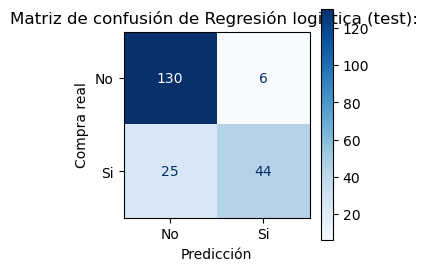

[[130   6]
 [ 25  44]]
-------------------------------------------------------------------------------------------------------
Curva ROC  Regresión logistica
roc_auc_score:  0.8281116794543905


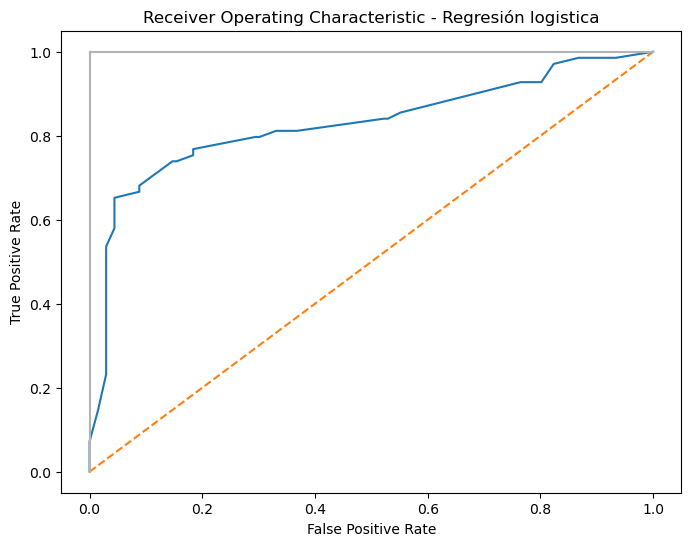

Cross-validation K-fold  Regresión logistica
Accuracy: 0.749 (0.082)
Stratified K-Fold  Regresión logistica
Iteracion:  1  Accuracy: 0.8043478260869565
Iteracion:  1  Precision: 0.75
Iteracion:  2  Accuracy: 0.7608695652173914
Iteracion:  2  Precision: 0.7
Iteracion:  3  Accuracy: 0.7608695652173914
Iteracion:  3  Precision: 0.7272727272727273
Iteracion:  4  Accuracy: 0.8043478260869565
Iteracion:  4  Precision: 0.8888888888888888
Iteracion:  5  Accuracy: 0.7391304347826086
Iteracion:  5  Precision: 0.6666666666666666
Iteracion:  6  Accuracy: 0.7608695652173914
Iteracion:  6  Precision: 0.7272727272727273
Iteracion:  7  Accuracy: 0.782608695652174
Iteracion:  7  Precision: 0.75
Iteracion:  8  Accuracy: 0.7333333333333333
Iteracion:  8  Precision: 0.6363636363636364
Iteracion:  9  Accuracy: 0.6888888888888889
Iteracion:  9  Precision: 0.5454545454545454
Iteracion:  10  Accuracy: 0.8444444444444444
Iteracion:  10  Precision: 0.9
Iteracion:  11  Accuracy: 0.7777777777777778
Iteracion:  11

In [165]:
# MODELADO CON: 'Regresión logistica'
imprimir_metricas(modelos[1], listado_modelos[1])

## Comentarios de resultados del modelo Regresion Logistica

### Observaciones sobre el Reporte de Classification

Los informes de clasificación muestran el rendimiento de un modelo de Regresión Logística en un problema de clasificación binaria.

* En el conjunto de prueba:
   ->Para la clase 0 (negativa), la precisión es del 83.87% y el recall es del 95.59%. Esto indica que el modelo clasifica correctamente alrededor del 83.87% de las instancias negativas y es capaz de identificar alrededor del 95.59% de las instancias reales de la clase negativa.
   -> Para la clase 1 (positiva), la precisión es del 88.00% y el recall es del 63.77%. Esto significa que el modelo clasifica correctamente alrededor del 88.00% de las instancias positivas y es capaz de identificar alrededor del 63.77% de las instancias reales de la clase positiva.
   -> La exactitud general en el conjunto de prueba es del 84.88%.

* En el conjunto de entrenamiento:
   -> Para la clase 0 (negativa), la precisión es del 81.98% y el recall es del 99.37%. Esto indica que el modelo clasifica correctamente alrededor del 81.98% de las instancias negativas y es capaz de identificar alrededor del 99.37% de las instancias reales de la clase negativa.
   -> Para la clase 1 (positiva), la precisión es del 97.87% y el recall es del 57.14%. Esto significa que el modelo clasifica correctamente alrededor del 97.87% de las instancias positivas y es capaz de identificar alrededor del 57.14% de las instancias reales de la clase positiva.
   -> La exactitud general en el conjunto de entrenamiento es del 85.12%.

En general, el modelo muestra un rendimiento aceptable, pero parece tener dificultades para identificar correctamente las instancias positivas, especialmente en el conjunto de prueba. 
A futuro: sería útil explorar estrategias para mejorar el recall de la clase positiva y abordar posibles desequilibrios de clases o seleccionar características más relevantes para mejorar el rendimiento general del modelo.


### Observaciones sobre la matriz de confusión
La matriz de confusión muestra que el modelo tiene 130 verdaderos positivos (VP) y 44 verdaderos negativos (VN), lo que indica una buena capacidad para clasificar correctamente ambas clases. Sin embargo, también tiene 6 falsos positivos (FP) y 25 falsos negativos (FN), lo que indica que el modelo tiene dificultades para clasificar correctamente algunas instancias de ambas clases. Es importante investigar más a fondo la naturaleza de estos errores para mejorar el rendimiento del modelo y evitar posibles errores costosos o inexactitudes en la clasificación.

### Observaciones de la Curva ROC
Esta curva es muy similar a la obtenida con el metodo anterior.
Dado que nuestro valor de roc_auc_score es 0.8281116794543905, indica que el rendimiento del modelo es bueno en general.

### Observaciones de metrica Cross-validation K-fold
El resultado del cross-validation muestra que el modelo de Regresión Logística tiene una precisión promedio de 0.725 y una exactitud promedio de 0.764. Sin embargo, hay cierta variabilidad entre las iteraciones de Stratified K-Fold, lo que sugiere que el rendimiento puede depender de la división de los datos. El modelo parece tener dificultades en clasificar correctamente algunas instancias, especialmente en las clases menos representadas. 

# Random Forest

Classification report de  Random Forest (test)
              precision    recall  f1-score   support

           0  0.8387097 0.9558824 0.8934708       136
           1  0.8800000 0.6376812 0.7394958        69

    accuracy                      0.8487805       205
   macro avg  0.8593548 0.7967818 0.8164833       205
weighted avg  0.8526074 0.8487805 0.8416451       205

------------------------------------------------------------------------------------------
Classification report de  Random Forest (train)
              precision    recall  f1-score   support

           0  0.8198433 0.9936709 0.8984263       316
           1  0.9787234 0.5714286 0.7215686       161

    accuracy                      0.8511530       477
   macro avg  0.8992834 0.7825497 0.8099975       477
weighted avg  0.8734695 0.8511530 0.8387322       477

-------------------------------------------------------------------------------------------------------
Matriz de confusion de  Random Forest


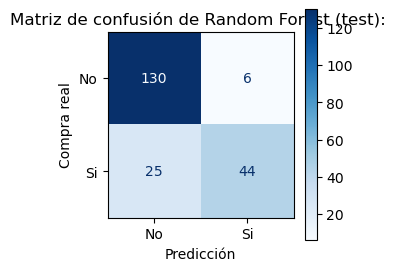

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[[130   6]
 [ 25  44]]
-------------------------------------------------------------------------------------------------------
Feature Importance de  Random Forest


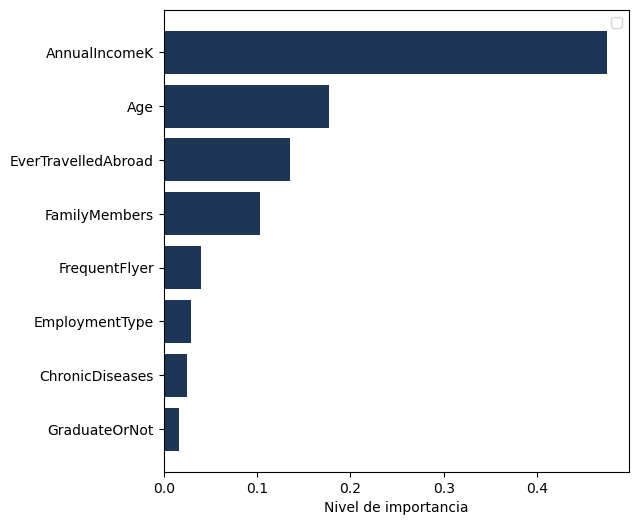

Curva ROC  Random Forest
roc_auc_score:  0.8281116794543905


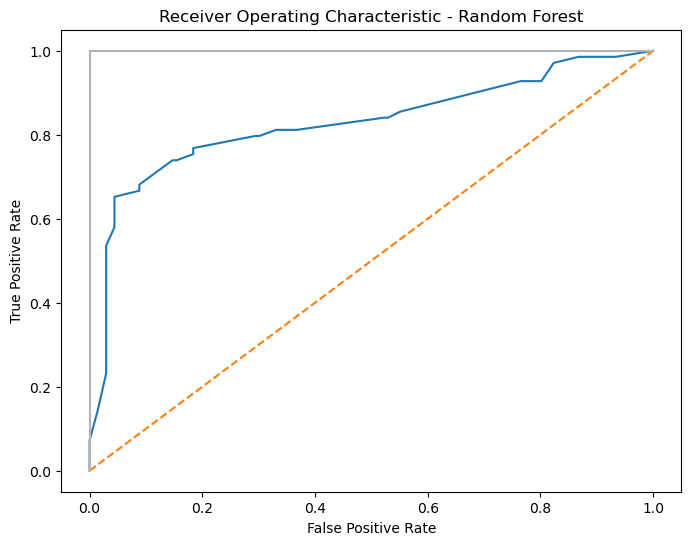

Cross-validation K-fold  Random Forest
Accuracy: 0.729 (0.109)
Stratified K-Fold  Random Forest
Iteracion:  1  Accuracy: 0.8260869565217391
Iteracion:  1  Precision: 0.7692307692307693
Iteracion:  2  Accuracy: 0.8478260869565217
Iteracion:  2  Precision: 0.9
Iteracion:  3  Accuracy: 0.782608695652174
Iteracion:  3  Precision: 0.8
Iteracion:  4  Accuracy: 0.8260869565217391
Iteracion:  4  Precision: 1.0
Iteracion:  5  Accuracy: 0.8043478260869565
Iteracion:  5  Precision: 0.8888888888888888
Iteracion:  6  Accuracy: 0.8260869565217391
Iteracion:  6  Precision: 0.9
Iteracion:  7  Accuracy: 0.8478260869565217
Iteracion:  7  Precision: 0.9090909090909091
Iteracion:  8  Accuracy: 0.8
Iteracion:  8  Precision: 0.8
Iteracion:  9  Accuracy: 0.7777777777777778
Iteracion:  9  Precision: 0.7777777777777778
Iteracion:  10  Accuracy: 0.9111111111111111
Iteracion:  10  Precision: 1.0
Iteracion:  11  Accuracy: 0.8222222222222222
Iteracion:  11  Precision: 1.0
Iteracion:  12  Accuracy: 0.82222222222222

In [169]:
# MODELADO CON: 'Random Forest'
imprimir_metricas(modelos[2], listado_modelos[2])

### Observaciones sobre el Reporte de Classification
En general, el modelo muestra un rendimiento sólido, pero tiene cierta dificultad para clasificar correctamente las instancias de la clase positiva, especialmente en el conjunto de prueba. Sería útil explorar técnicas de ajuste o selección de características para mejorar el recall de la clase positiva y obtener un rendimiento más equilibrado en ambos conjuntos de datos.

- En el conjunto de datos de prueba:
   - Para la clase 0 (negativa), el modelo tiene una precisión del 83.87% y un recall del 95.59%. Esto indica que clasifica correctamente alrededor del 83.87% de las instancias negativas y es capaz de identificar alrededor del 95.59% de las instancias reales de la clase negativa.
   - Para la clase 1 (positiva), el modelo tiene una precisión del 88.00% y un recall del 63.77%. Esto significa que clasifica correctamente alrededor del 88.00% de las instancias positivas y es capaz de identificar alrededor del 63.77% de las instancias reales de la clase positiva.
   - La exactitud general en el conjunto de prueba es del 84.88%.

- En el conjunto de datos de entrenamiento:
   - Para la clase 0 (negativa), el modelo tiene una precisión del 81.98% y un recall del 99.37%. Esto indica que clasifica correctamente alrededor del 81.98% de las instancias negativas y es capaz de identificar alrededor del 99.37% de las instancias reales de la clase negativa.
   - Para la clase 1 (positiva), el modelo tiene una precisión del 97.87% y un recall del 57.14%. Esto significa que clasifica correctamente alrededor del 97.87% de las instancias positivas y es capaz de identificar alrededor del 57.14% de las instancias reales de la clase positiva.
   - La exactitud general en el conjunto de entrenamiento es del 85.12%.



### Observaciones sobre la matriz de confusión
El modelo tiene un rendimiento aceptable al clasificar correctamente la clase 0 (negativa) con una precisión del 95.59%. Sin embargo, presenta dificultades para clasificar correctamente la clase 1 (positiva) con una precisión del 88.00%. El recall (sensibilidad) para la clase 1 es del 63.77%, lo que indica que el modelo identifica alrededor del 63.77% de las instancias reales de la clase 1.

### Observaciones del grafico de Featured Importance
 
En este caso se observa que para el Random forest la caracteristicas mas relavante, muy lejos del resto es AnnualIncomeK. Despues la siguen  Ag, EverTravelledAbroad y FamilyMembers.
El resto de las variabls se identifican como poco relevantes.

### Observaciones de la Curva ROC
Esta curva es muy similar a la obtenida con el metodo anterior. 
El valor de roc_auc_score en este caso es identico 0.8281116794543905, indica que el rendimiento del modelo es bueno en general.

### Observaciones de metrica Cross-validation K-fold
El resultado del cross-validation muestra que el modelo Random Forest tiene una precisión promedio de 0.872 y una exactitud promedio de 0.821. Las iteraciones de Stratified K-Fold indican que el modelo es capaz de clasificar con precisión las instancias en varias iteraciones, con algunas alcanzando una precisión cercana al 100%. Sin embargo, hay cierta variabilidad entre las iteraciones, lo que sugiere que el rendimiento puede depender de la división de los datos. En general, el modelo muestra un rendimiento sólido, pero puede ser beneficioso ajustar los hiperparámetros o considerar técnicas adicionales de selección de características para mejorar la estabilidad del modelo y obtener un rendimiento más consistente.

## Tiempos de entrenamiento
Con el fin de realizar una comparación entre los tiempos que demanda la utilización de cada uno de los algoritmos es que se realiza un cuadro comparativo de los tiempos

In [170]:
tiempos = pd.DataFrame()
tiempos["modelos"] = listado_modelos
tiempos["tiempo"] = tiempos_entrenamiento
display(tiempos)

,modelos,tiempo
0,Arbol de decisión,0.008021
1,Regresión logistica,10.696268
2,Random Forest,0.079635


## Métricas de los modelos

In [182]:
display(metricas_modelos)


,precision_test,precision_entrenamiento,accuracy_test,accuracy_entrenamiento,recall_test,recall_entrenamiento,f1_test,f1_entrenamiento
modelo,,,,,,,,
Arbol de decisión,0.720000,0.926606,0.770732,0.857442,0.521739,0.627329,0.605042,0.748148
Regresión logistica,0.719298,0.737374,0.785366,0.761006,0.594203,0.453416,0.650794,0.561538
Random Forest,0.880000,0.978723,0.848780,0.851153,0.637681,0.571429,0.739496,0.721569


# Optimización de modelo RANDOM FOREST

Mejoras del Modelo:  Random Forest
Mejores parametros {'max_depth': 8, 'n_estimators': 20, 'random_state': RandomState(MT19937) at 0x1D13B953740}
Mejor CV score 0.671875
Matriz de confunsión del Modelo mejorado


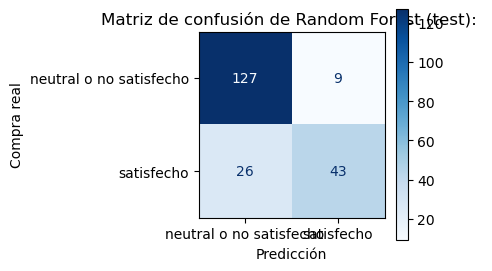

Curva ROC del Modelo mejorado
roc_auc_score:  0.7909207161125318


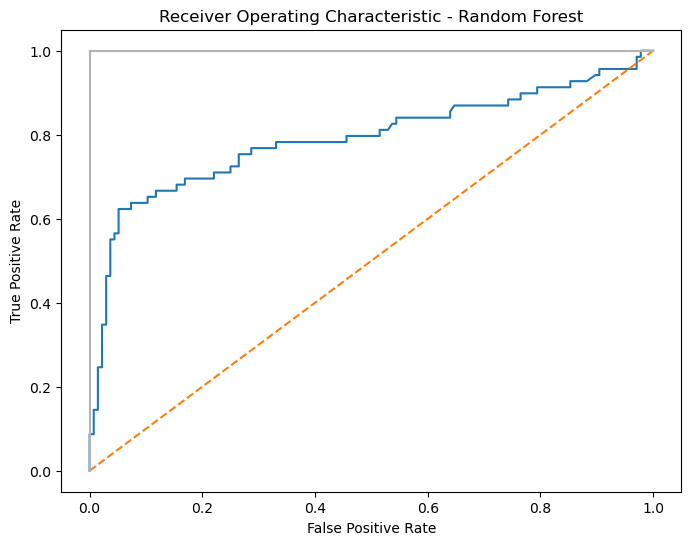

Scores para Modelo mejorado
Precision test
0.8269230769230769
precision_entrenamiento
0.9734513274336283
accuracy_test
0.8292682926829268
accuracy_entrenamiento
0.8867924528301887
recall_test
0.6231884057971014
recall_entrenamiento
0.6832298136645962
f1_test
0.7107438016528926
f1_entrenamiento:  0.8029197080291971
0.8029197080291971
Matriz de resultado de parametros Modelo 


,iter,n_resources,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,param_random_state,params,...,split8_train_score,split9_train_score,split10_train_score,split11_train_score,split12_train_score,split13_train_score,split14_train_score,split15_train_score,mean_train_score,std_train_score
0,0,64,0.041222,0.006270,0.007072,0.004710,5,10,RandomState(MT19937),"{'max_depth': 5, 'n_estimators': 10, 'random_s...",...,1.000000,0.947368,0.913043,0.857143,1.000000,1.000000,0.941176,0.933333,0.952159,0.043529
1,0,64,0.057846,0.016481,0.007056,0.002470,5,20,RandomState(MT19937),"{'max_depth': 5, 'n_estimators': 20, 'random_s...",...,1.000000,0.950000,0.958333,1.000000,1.000000,0.944444,0.941176,1.000000,0.987122,0.022541
2,0,64,0.147361,0.029814,0.013601,0.003784,5,50,RandomState(MT19937),"{'max_depth': 5, 'n_estimators': 50, 'random_s...",...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
3,0,64,0.204647,0.043890,0.014192,0.004590,5,100,RandomState(MT19937),"{'max_depth': 5, 'n_estimators': 100, 'random_...",...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
4,0,64,0.015558,0.003700,0.003947,0.004633,6,10,RandomState(MT19937),"{'max_depth': 6, 'n_estimators': 10, 'random_s...",...,1.000000,0.956522,0.956522,0.956522,1.000000,1.000000,1.000000,1.000000,0.981723,0.023901
5,0,64,0.035032,0.007027,0.004368,0.004049,6,20,RandomState(MT19937),"{'max_depth': 6, 'n_estimators': 20, 'random_s...",...,1.000000,1.000000,0.962963,1.000000,1.000000,1.000000,1.000000,1.000000,0.997685,0.008965
6,0,64,0.117920,0.027954,0.008693,0.004492,6,50,RandomState(MT19937),"{'max_depth': 6, 'n_estimators': 50, 'random_s...",...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.996711,0.012740
7,0,64,0.141515,0.016775,0.010517,0.004463,6,100,RandomState(MT19937),"{'max_depth': 6, 'n_estimators': 100, 'random_...",...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
8,0,64,0.016035,0.005463,0.002518,0.003736,8,10,RandomState(MT19937),"{'max_depth': 8, 'n_estimators': 10, 'random_s...",...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.991086,0.018706
9,0,64,0.031866,0.007681,0.003759,0.003911,8,20,RandomState(MT19937),"{'max_depth': 8, 'n_estimators': 20, 'random_s...",...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


In [177]:
  nombre = 'Random Forest'
  param_grid=[ {"random_state":[rng], "n_estimators":[10,20,50,100], "max_depth":[5,6,8]}]

  halving_cv = HalvingGridSearchCV(RandomForestClassifier(), param_grid, scoring="precision",cv=16,random_state=25).fit(xentrenamiento, yentrenamiento)
  yprediccion_testeo=halving_cv.predict(xtesteo)
  yprediccion_entrenamiento=halving_cv.predict(xentrenamiento)
  

  print("Mejoras del Modelo: ", bolder(nombre))
  print("Mejores parametros", halving_cv.best_params_)
  print("Mejor CV score", halving_cv.best_score_)
  
  print("Matriz de confunsión del Modelo mejorado")
  matriz_confusion(ytesteo,halving_cv.predict(xtesteo),nombre,['neutral o no satisfecho','satisfecho'])
  
  #Curva ROC
  # Calculo de tasas 
  print("Curva ROC del Modelo mejorado")
  false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(ytesteo, proba1)
  print('roc_auc_score: ', roc_auc_score(ytesteo, proba1))
  curva_roc(nombre,false_positive_rate1, true_positive_rate1)

  print("Scores para Modelo mejorado")
  print('Precision test')
  print(precision_score(ytesteo, yprediccion_testeo))
  print('precision_entrenamiento')
  print(precision_score(yentrenamiento, yprediccion_entrenamiento))
  print('accuracy_test')
  print(accuracy_score(ytesteo, yprediccion_testeo))
  print('accuracy_entrenamiento')
  print(accuracy_score(yentrenamiento, yprediccion_entrenamiento))
  print('recall_test')
  print(recall_score(ytesteo, yprediccion_testeo))
  print('recall_entrenamiento')
  print(recall_score(yentrenamiento, yprediccion_entrenamiento))
  print('f1_test')
  print(f1_score(ytesteo, yprediccion_testeo))
  print('f1_entrenamiento: ', f1_score(yentrenamiento, yprediccion_entrenamiento))
  print(f1_score(yentrenamiento, yprediccion_entrenamiento))
  
    
  print("Matriz de resultado de parametros Modelo ")
  display(pd.DataFrame(halving_cv.cv_results_))

# Conclusion

Para determinar cuál es el mejor modelo de clasificación, es necesario evaluar las métricas en función del objetivo del problema y las características del conjunto de datos.

En este caso, se tienen tres modelos: Árbol de Decisión, Regresión Logística y Random Forest. Si nos centramos en la métrica de precisión en el conjunto de prueba (precision_test), el mejor modelo sería Random Forest con una precisión del 88.00%. Esto significa que el 88.00% de las instancias clasificadas como positivas por el modelo realmente pertenecen a la clase positiva.

Sin embargo, si consideramos otras métricas, como el recall_test o el f1_test, el modelo de Random Forest puede no ser el mejor. Por ejemplo, el modelo de Regresión Logística tiene un recall_test del 59.42%, lo que indica que identifica un mayor porcentaje de instancias reales de la clase positiva en comparación con Random Forest.

El criterio para determinar el mejor modelo depende del contexto del problema y las necesidades específicas. Si se prioriza la precisión en la clasificación de la clase positiva, entonces Random Forest sería la elección. Si se busca un mejor equilibrio entre precisión y recall, el modelo de Regresión Logística podría ser preferible. Siempre es recomendable considerar múltiples métricas y realizar análisis adicionales para tomar la decisión más adecuada para el problema en cuestión.